# eda-stackoverflow-survey-project

# Exploratory Data Analysis Of StackOverFlow Survey Data 2020
#### By - BALRAJ KUMAR 

*Analyzing responses from the Stack Overflow Annual Developer Survey 2020*

![](https://i.imgur.com/qXhHKqv.png)

## Introduction


Stack Overflow’s annual Developer Survey is the largest and most comprehensive survey of people who code around the world. Each year, we field a survey covering everything from developers’ favorite technologies to their job preferences.Year 2020 marks the ninth year that stackoverFlow published their annual Developer Survey results, and nearly 90,000 developers took the 20-minute survey.


Under this project, we'll analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. We can find the raw data & official analysis easily here: https://insights.stackoverflow.com/survey.

There are several options for getting the dataset into Jupyter:

-Download the CSV manually and upload it via Jupyter's GUI                                                                      
-Use the urlretrieve function from the urllib.request to download CSV files from a raw URL                                       
-Use a helper library, e.g., [`opendatasets`](https://github.com/JovianML/opendatasets), which contains a collection of curated datasets and provides a helper function for direct download.

We'll use the `opendatasets` helper library to download the files.

Let's first install the OpenDataSets Library to use the Dataset.

In [371]:
!pip install opendatasets --upgrade

In [373]:
import opendatasets as od

Now we will download the file name 'stackoverflow-developer-survey-2020'

In [376]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_public.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_schema.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/README.txt


Let's verify that the dataset was downloaded into the directory `stackoverflow-developer-survey-2020` and retrieve the list of files in the dataset.

For doing so, we need to use the os library

In [380]:
import os

In [382]:
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_public.csv', 'survey_results_schema.csv', 'README.txt']

We can also go through the downloaded files using the "File" > "Open" menu option in Jupyter.  The dataset contains three files:

- `README.txt` - Information about the dataset
- `survey_results_schema.csv` - The list of questions, and shortcodes for each question
- `survey_results_public.csv` - The full list of responses to the questions 

Let's load the CSV files using the Pandas library. We'll use the name `survey_raw_df` for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [385]:
import pandas as pd

In [387]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [389]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains over 64,000 responses to 60 questions. The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

Let's view the list of columns contained in the data frame using the .columns function

In [392]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

It appears that shortcodes for questions have been used as column names. 

We can refer to the schema file to see the full text of each question. The schema file contains only two columns: `Column` and `QuestionText`. We can load it as Pandas Series with `Column` as the index and the  `QuestionText` as the value.

In [395]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

Let's check out the schema_raw Dataframe

In [35]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

Now retrieving any question becomes very easy. We can now use schema_raw to retrieve the full question text for any column in survey_raw_df.

Let's check if it is working for column name 'YearsCodePro'

In [39]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [41]:
schema_raw['WorkWeekHrs']

'On average, how many hours per week do you work? Please enter a whole number in the box.'

Another method of doing the same thin is using the . operator after writing the dataframe name.

In [44]:
schema_raw.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

We've now loaded the dataset. We're ready to move on to the next step of preprocessing & cleaning the data for our analysis.

## Data Preparation & Cleaning

Our next step will be prepration of data and its cleaning.
While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [48]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

Let's check the  length of selected_columns

In [52]:
len(selected_columns)

20

We don't want to alter our original data,for that we need to extract a copy of this originsl dstfrsme with the selected columns.Let's extract a copy of the data from these columns into a new data frame survey_df. We can continue to modify further without affecting the original data frame.

In [55]:
survey_df = survey_raw_df[selected_columns].copy()

In [57]:
schema = schema_raw[selected_columns]

Checking the survey_raw_df dataframe

In [62]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


Simillarly, let's see the schema DF

In [65]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

Let's view some basic information about the data frame like shape,info,describe etc.

In [68]:
schema.shape

(20,)

That means schema contains 20 rows.

In [71]:
survey_df.shape

(64461, 20)

Survey_df contains 64461 rows and 20 columns.

In [74]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type `object`, either because they may contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value by using .to_numeric function. The non-numeric are converted to `NaN`.

In [77]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Setting Errors= 'coerce' return NaN whenever error is encountered.

Let's now view some basic statistics about numeric columns using the describe() function.

In [81]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279 which is a vague fact. This is a common issue with surveys,responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses. We can do this using the `.drop` method.

In [84]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

The same holds for `WorkWeekHrs`. Let's ignore entries where the value for the column is higher than 140 hours i.e 20 hours per day,which may sound absurd.

In [87]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

The gender column also allows for picking multiple options which means a single person could have chose multiple option under Gender. We'll remove values containing more than one option to simplify our analysis.

Before doing that,let's analyze the question.

In [93]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [95]:
survey_df['Gender'].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

Removing the records which contains multiple values using ;

In [98]:
import numpy as np

In [100]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.

In [103]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
35242,United Kingdom,36.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,15.0,20.0,14.0,C#;JavaScript;TypeScript,C#;JavaScript;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, desktop or ente...",37.0,Slightly dissatisfied,Remote work options;Office environment or comp...,Never,Fairly important
53928,Viet Nam,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,10.0,14.0,2.0,Bash/Shell/PowerShell;C#;HTML/CSS,Bash/Shell/PowerShell;C#;HTML/CSS,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, embedded applic...",40.0,Very satisfied,"Industry that I’d be working in;Languages, fra...",Never,Somewhat important
10075,Germany,23.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,5.0,2.0,HTML/CSS;JavaScript;Python;SQL;TypeScript,Go;JavaScript;Python,Every few months,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, back-end",40.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Somewhat important
55646,United Kingdom,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,18.0,12.0,C++;HTML/CSS;JavaScript;PHP;Python;Ruby;SQL,Python;Ruby;Rust,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,NaN,37.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important
57727,Egypt,NaN,Man,Some college/university study without earning ...,"A health science (such as nursing, pharmacy, r...",Yes,16.0,1.0,NaN,Python,Python,Once every few years,Watch help / tutorial videos,Student,NaN,NaN,NaN,NaN,NaN,NaN
53125,New Zealand,25.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,12.0,12.0,NaN,Bash/Shell/PowerShell;C#;Go;HTML/CSS;Java;Java...,Bash/Shell/PowerShell;C#;Go;HTML/CSS;Java;Java...,Every few months,Play games;Visit Stack Overflow;Panic;Do other...,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN,Somewhat important
22952,Germany,38.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,20.0,17.0,C#;HTML/CSS;JavaScript,NaN,Once every few years,Visit Stack Overflow,Employed full-time,"Developer, desktop or enterprise applications;...",5.0,Very satisfied,Office environment or company culture;Family f...,Occasionally: 1-2 days per quarter but less th...,Fairly important
53065,United States,50.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,36.0,3.0,NaN,Assembly;Bash/Shell/PowerShell;C#;C++;HTML/CSS...,NaN,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Student,NaN,NaN,NaN,Diversity of the company or organization;Oppor...,NaN,NaN
34604,United States,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A business discipline (such as accounting, fin...",No,16.0,3.0,2.0,Haskell;HTML/CSS;JavaScript;Python;SQL;TypeScript,Haskell;Python;Rust;SQL,Once a year,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,NaN,50.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Critically important
26347,United States,52.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,37.0,NaN,C;C++,Asse

## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some selection bias i.e it doesn't represent the universal situation but is true only for smaller portion of population. for example,since english is spoken majorly in US and India, most of the users of stackoverflow are also from the same countries.

For the data visualuzation we will be using  Matplotlib and Seaborn Libraries.
Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [128]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

`%matplotlib inline`command is used to embed the plots/graph in the same notebook rather than showing it in any other pop up window.

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [111]:
schema.Country

'Where do you live?'

Let's count the number of unique countries in the dataframe using the `.nunique` command

In [114]:
survey_df.Country.nunique()

183

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [117]:
survey_df.Country.value_counts()

Country
United States          12371
India                   8364
United Kingdom          3881
Germany                 3864
Canada                  2175
                       ...  
Nauru                      1
Lesotho                    1
Saint Lucia                1
Antigua and Barbuda        1
Marshall Islands           1
Name: count, Length: 183, dtype: int64

Now let's select the top 15 countries having highest number of counts using `.head()` function.

In [120]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

We can visualize this information using a bar chart.

`plt.figure(figsize)`function is used to alter the figure size.                                                                 
`plt.xticks(rotation)` function is used to rotate the x-axis mark.                                                               
`plt.title()` function is used for giving a title to the plot.

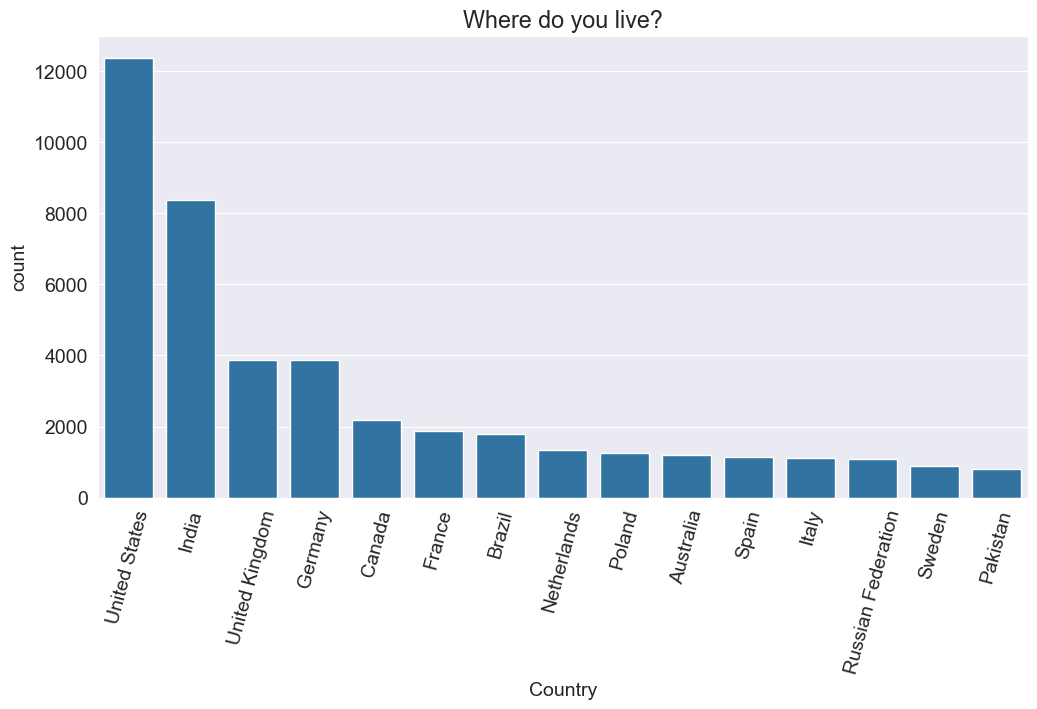

In [132]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

### Age

The distribution of respondent's age is another crucial factor to look at. We can use a histogram to visualize it. 

In [136]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

`plt.x/ylabel()`- This function is used to allot label to the respective axis

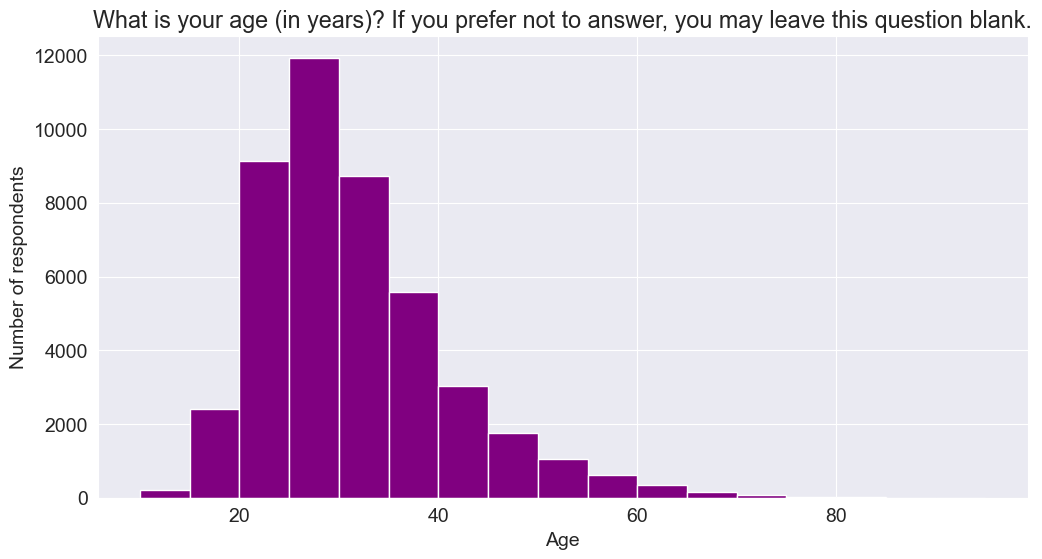

In [139]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,100,5),color="purple");

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last few decades.

### Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [146]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [148]:
gender_counts = survey_df.Gender.value_counts(dropna=False)
gender_counts

Gender
Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

A pie chart would be a great way to visualize the distribution.

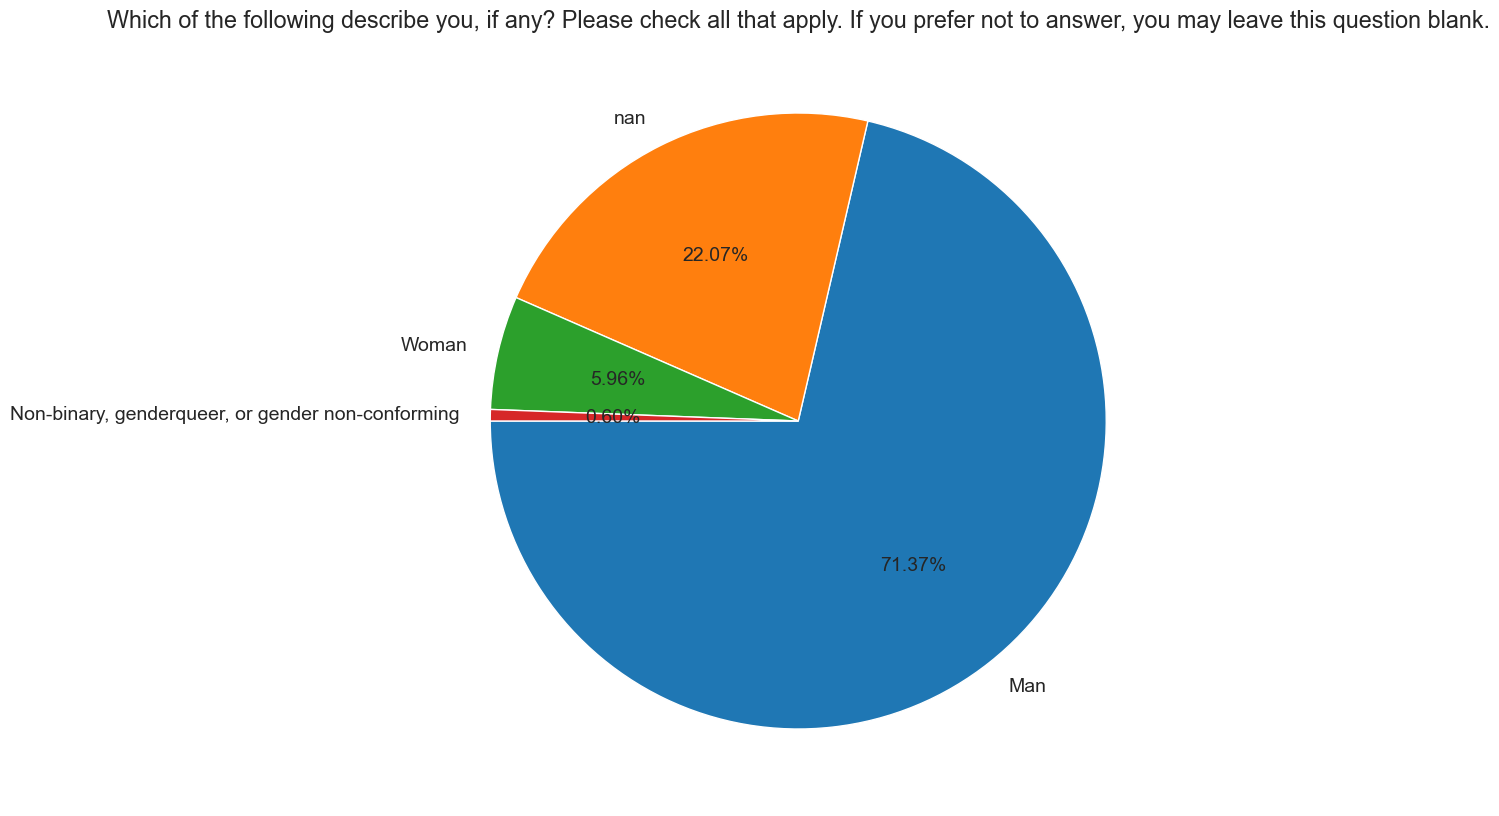

In [153]:
plt.figure(figsize=(12,10))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.2f%%', startangle=180);

Let's see the case when NaN values aren't included.

In [156]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

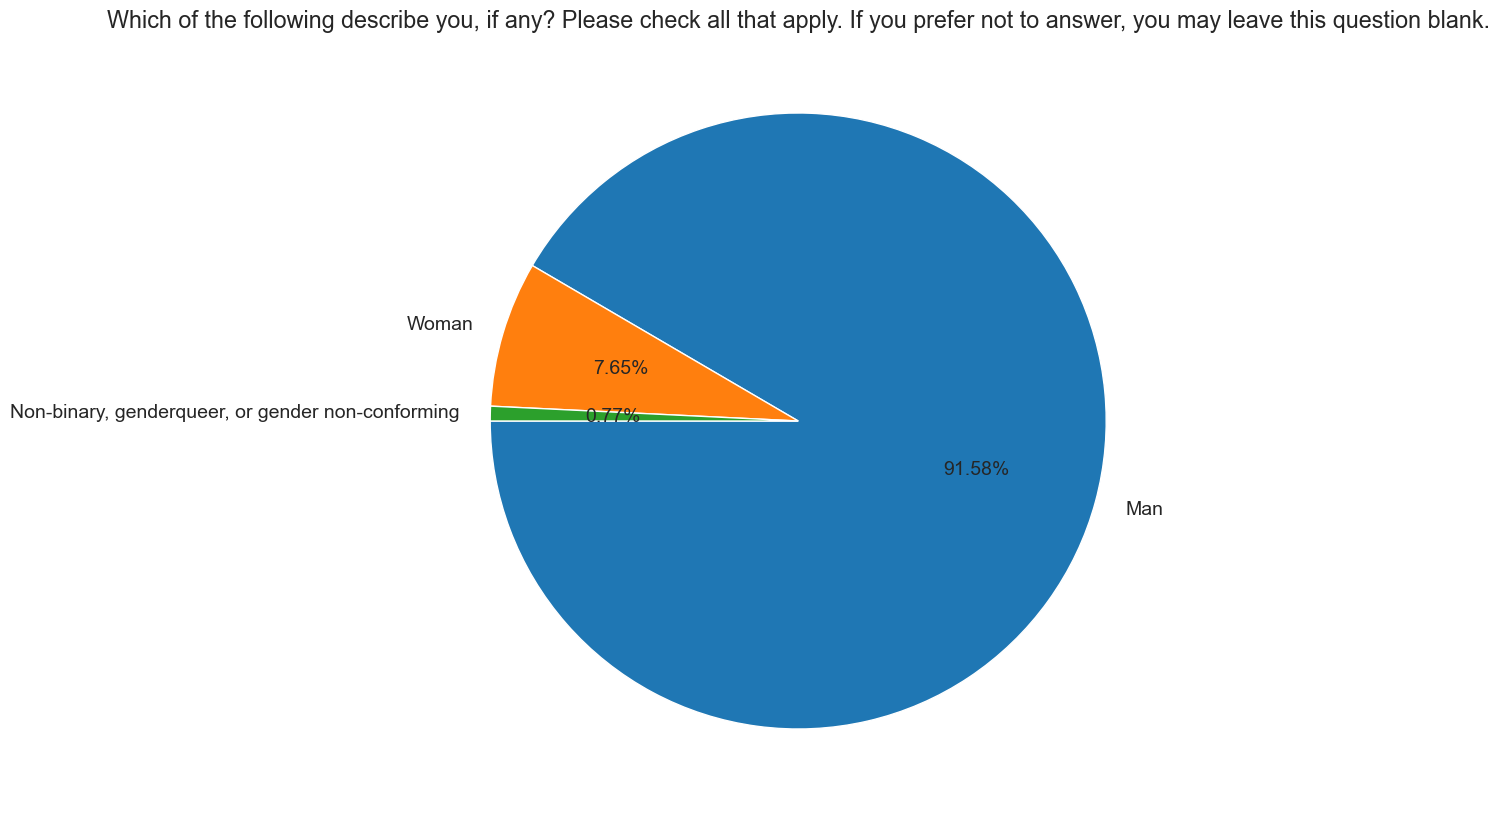

In [158]:
plt.figure(figsize=(12,10))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.2f%%', startangle=180);

When NaN values are also included,Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%. 

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

In [162]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

Let's have our eye on the unique enteries in the EdLevel column.

In [165]:
survey_df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

To insert a horizontal barplot we will be using `sns.countplot() under the seaborn library.

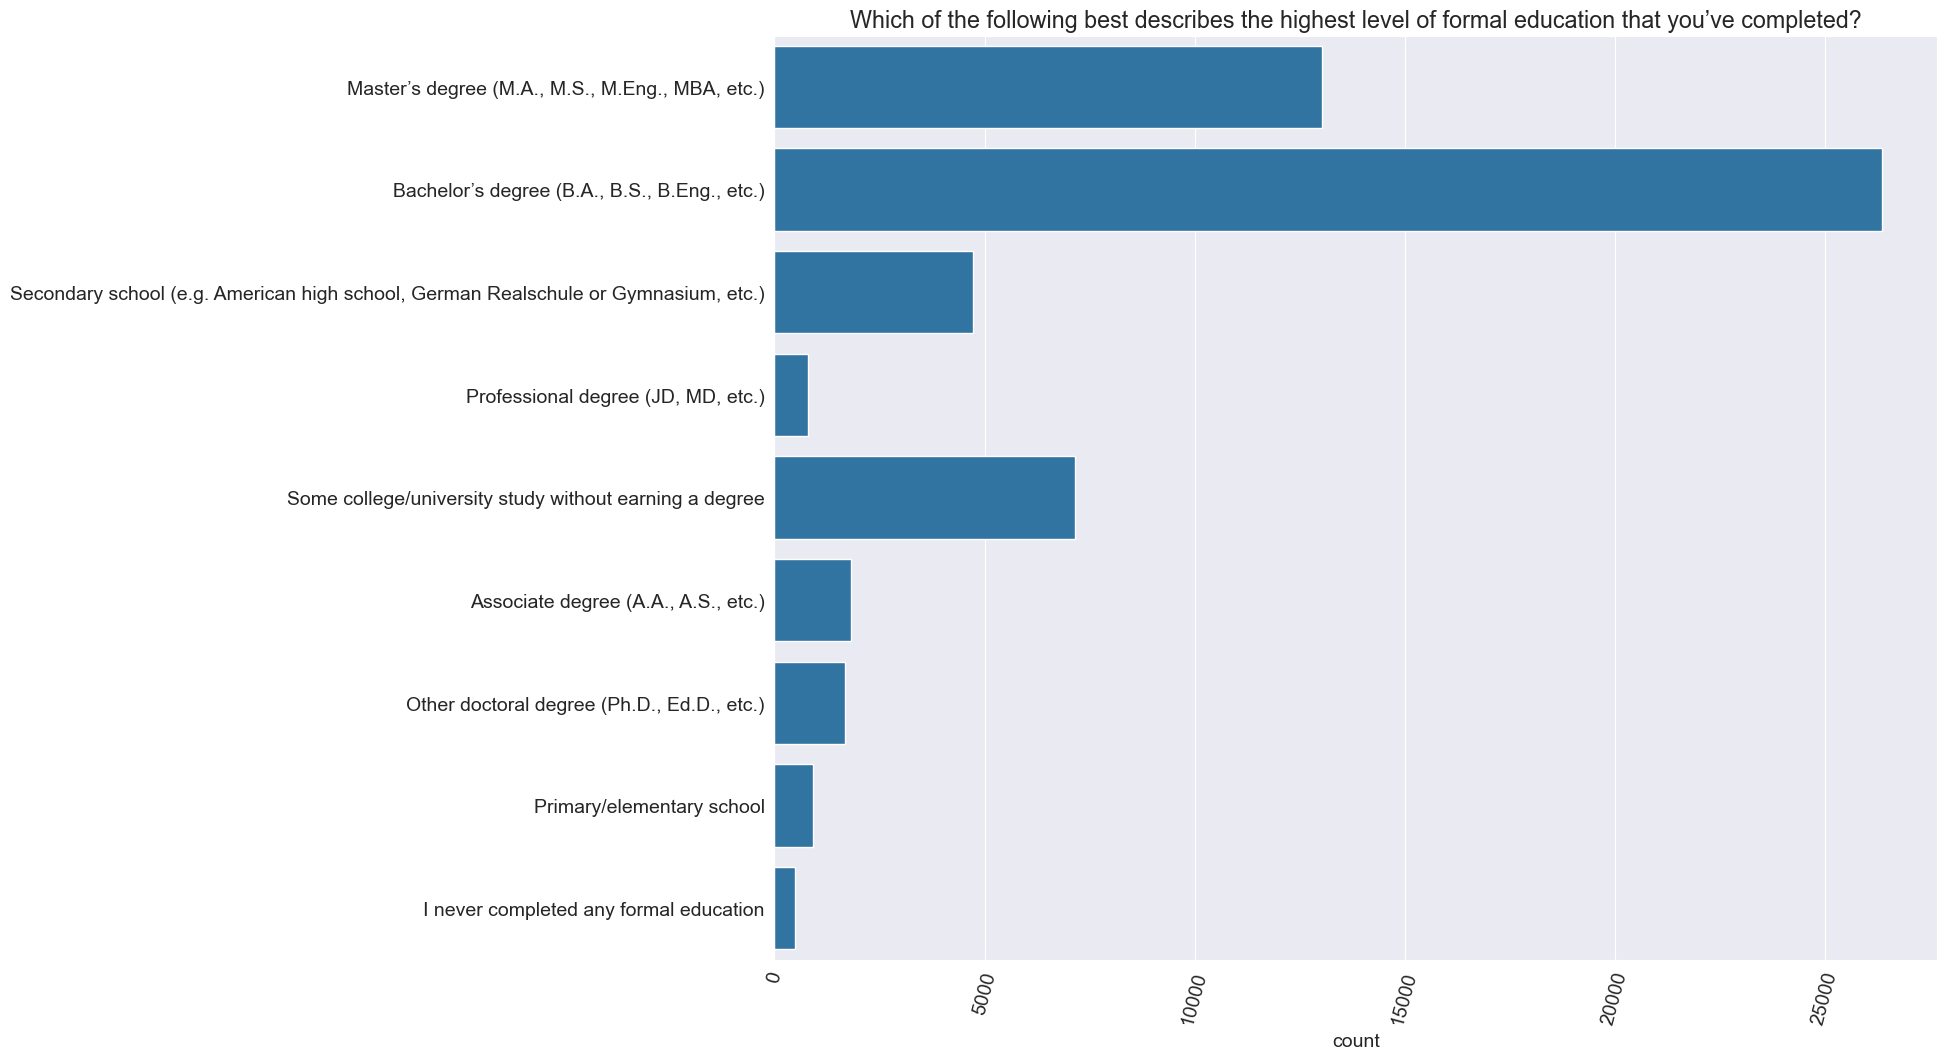

In [168]:
plt.figure(figsize=(15,12));
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.

In [172]:
schema.UndergradMajor

'What was your primary field of study?'

In [174]:
plt.figure(figsize=(15,15));
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()


<Figure size 1500x1500 with 0 Axes>

In [176]:
undergrad_pct

UndergradMajor
Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                         

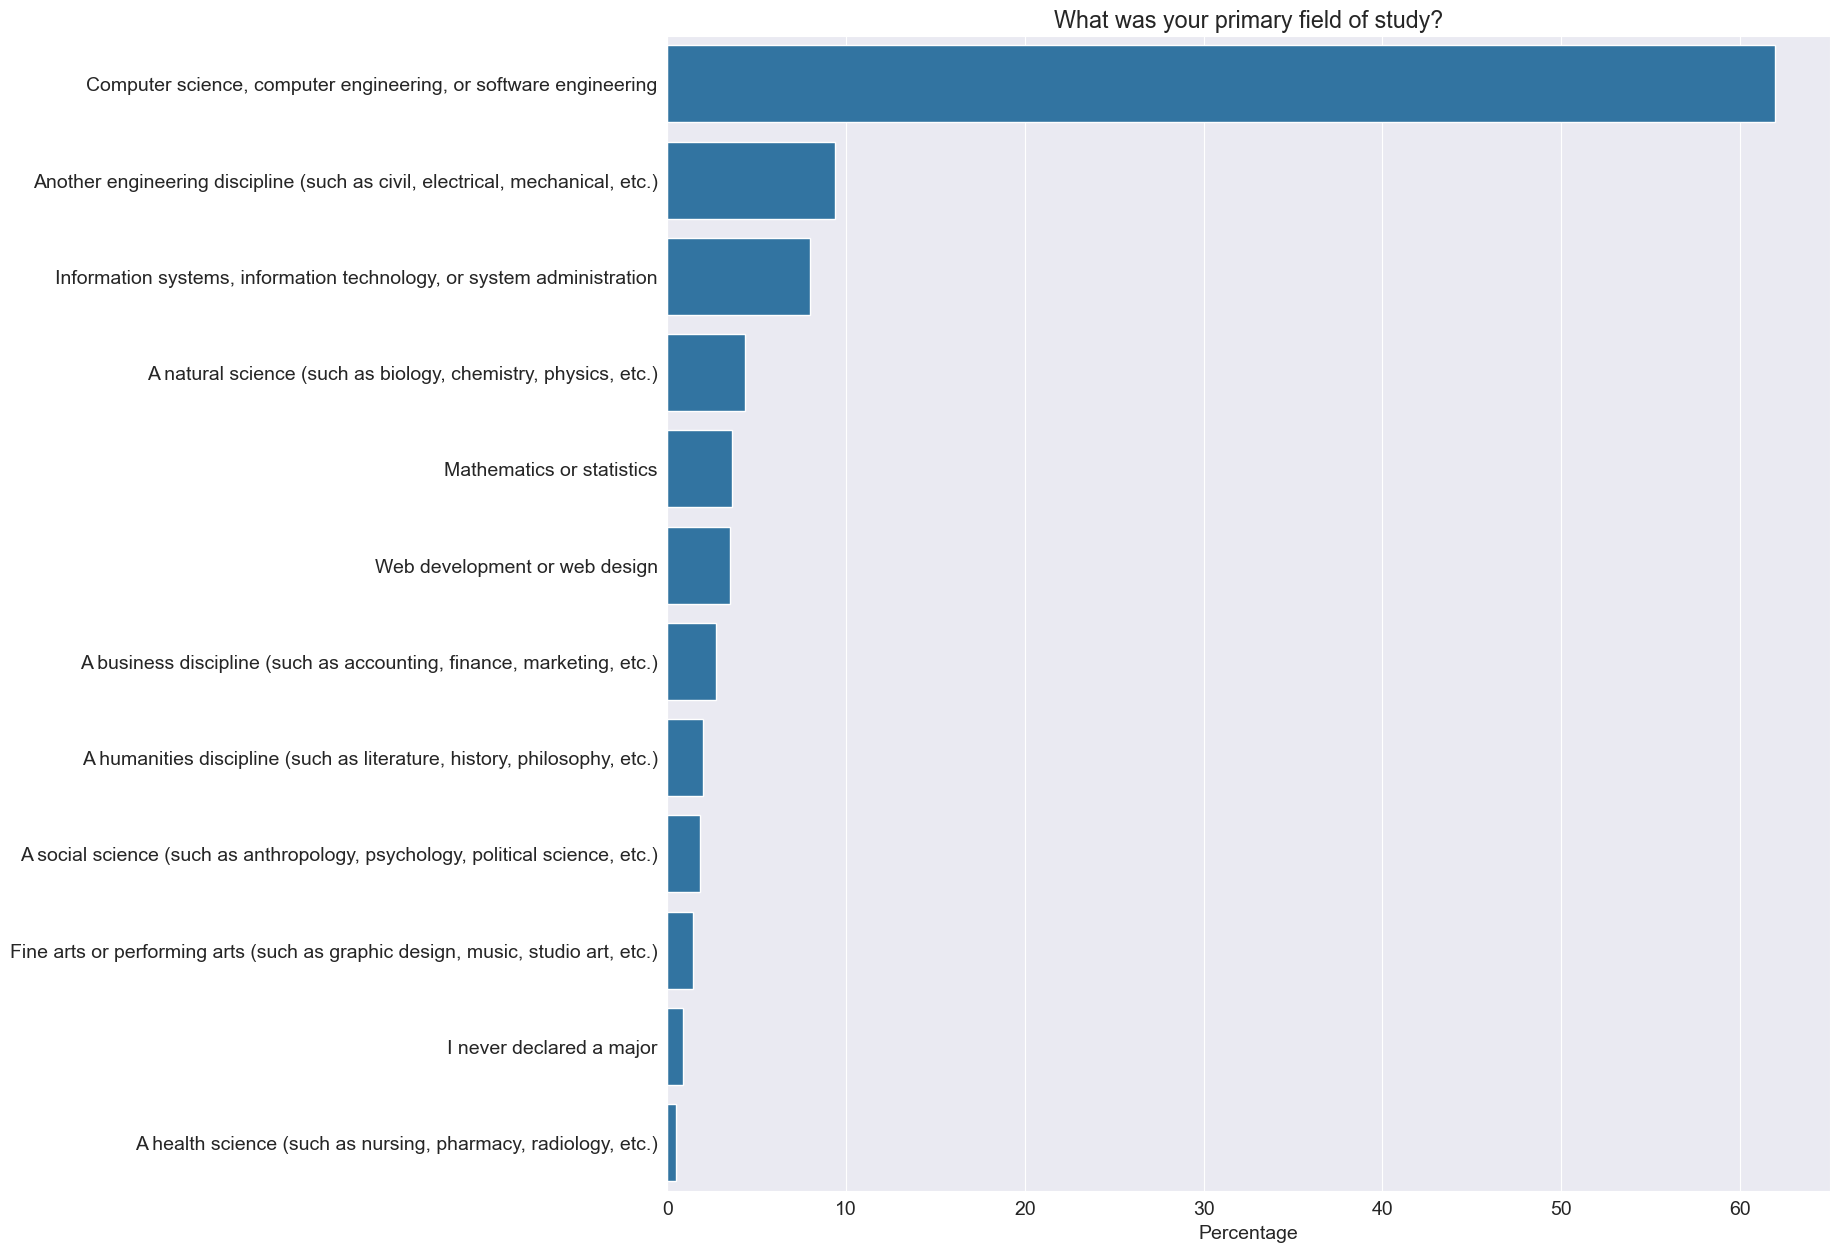

In [178]:
plt.figure(figsize=(15,15));
sns.barplot(x=undergrad_pct, y=undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

In [182]:
schema.Employment

'Which of the following best describes your current employment status?'

Another way to plot the horizontal graph in percentage using a single line code is as follows.

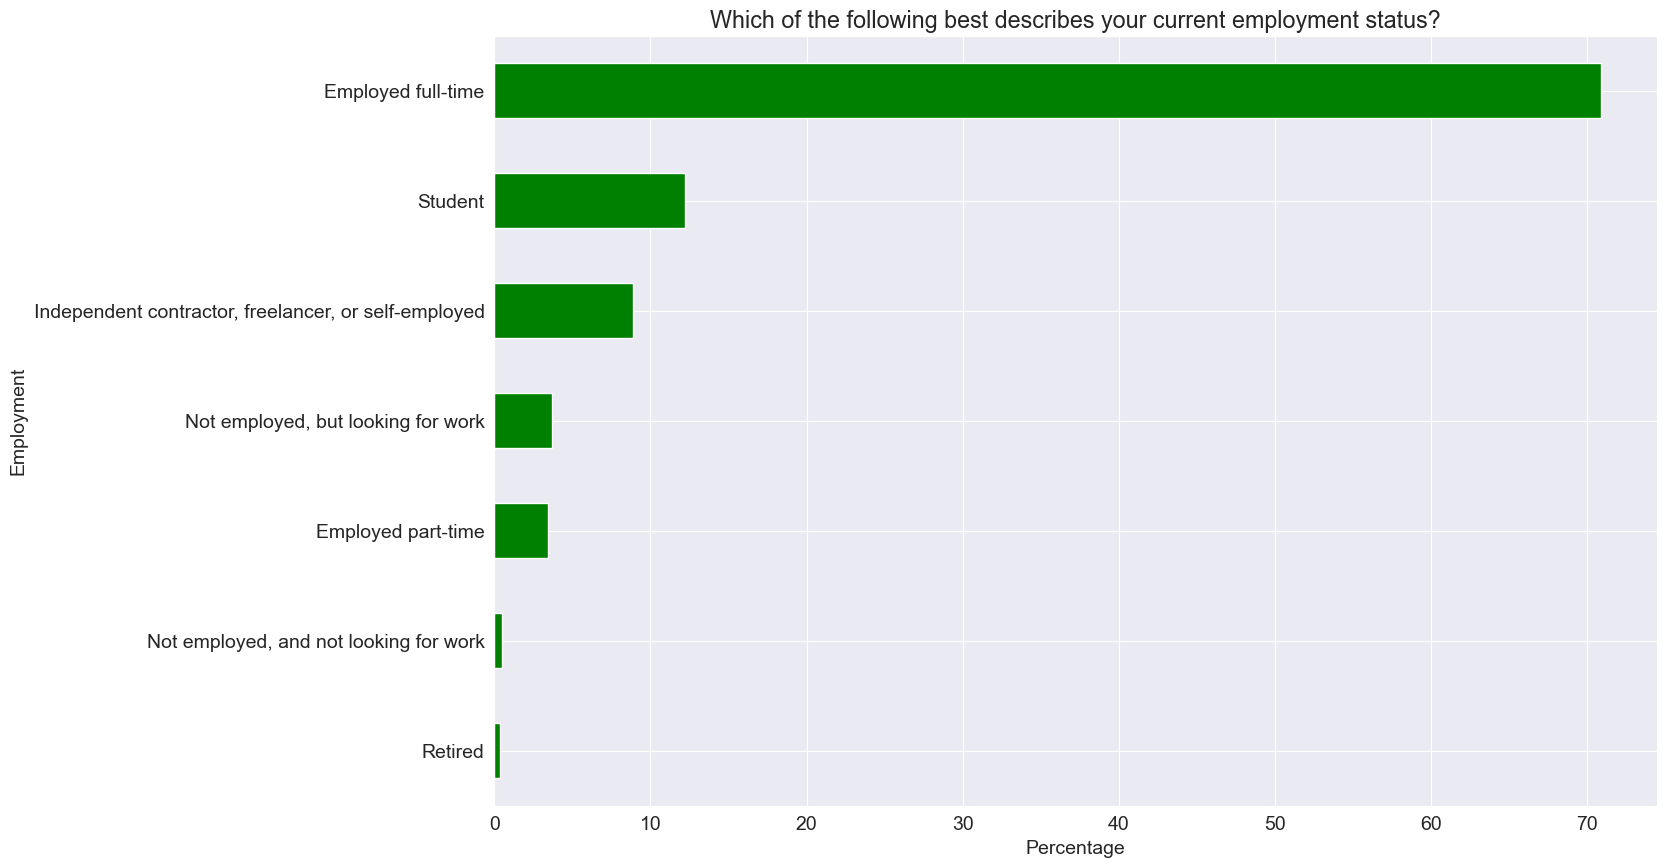

In [185]:
plt.figure(figsize=(15,10));
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers.

The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `;`, making it a bit harder to analyze directly.

In [191]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [193]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                       

In [195]:
survey_df.DevType.nunique()

8213

In [197]:
survey_df.DevType

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
64456                                  Senior executive/VP
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: DevType, Length: 64306, dtype: object

Let's define a helper function that turns a column containing lists of values (like `survey_df.DevType`) into a data frame with one column for each possible option.

In [228]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [230]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [232]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The `dev_type_df` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

We can now use the column-wise totals to identify the most common roles.

In [235]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

As one might expect, the most common roles include "Developer" in the name. 

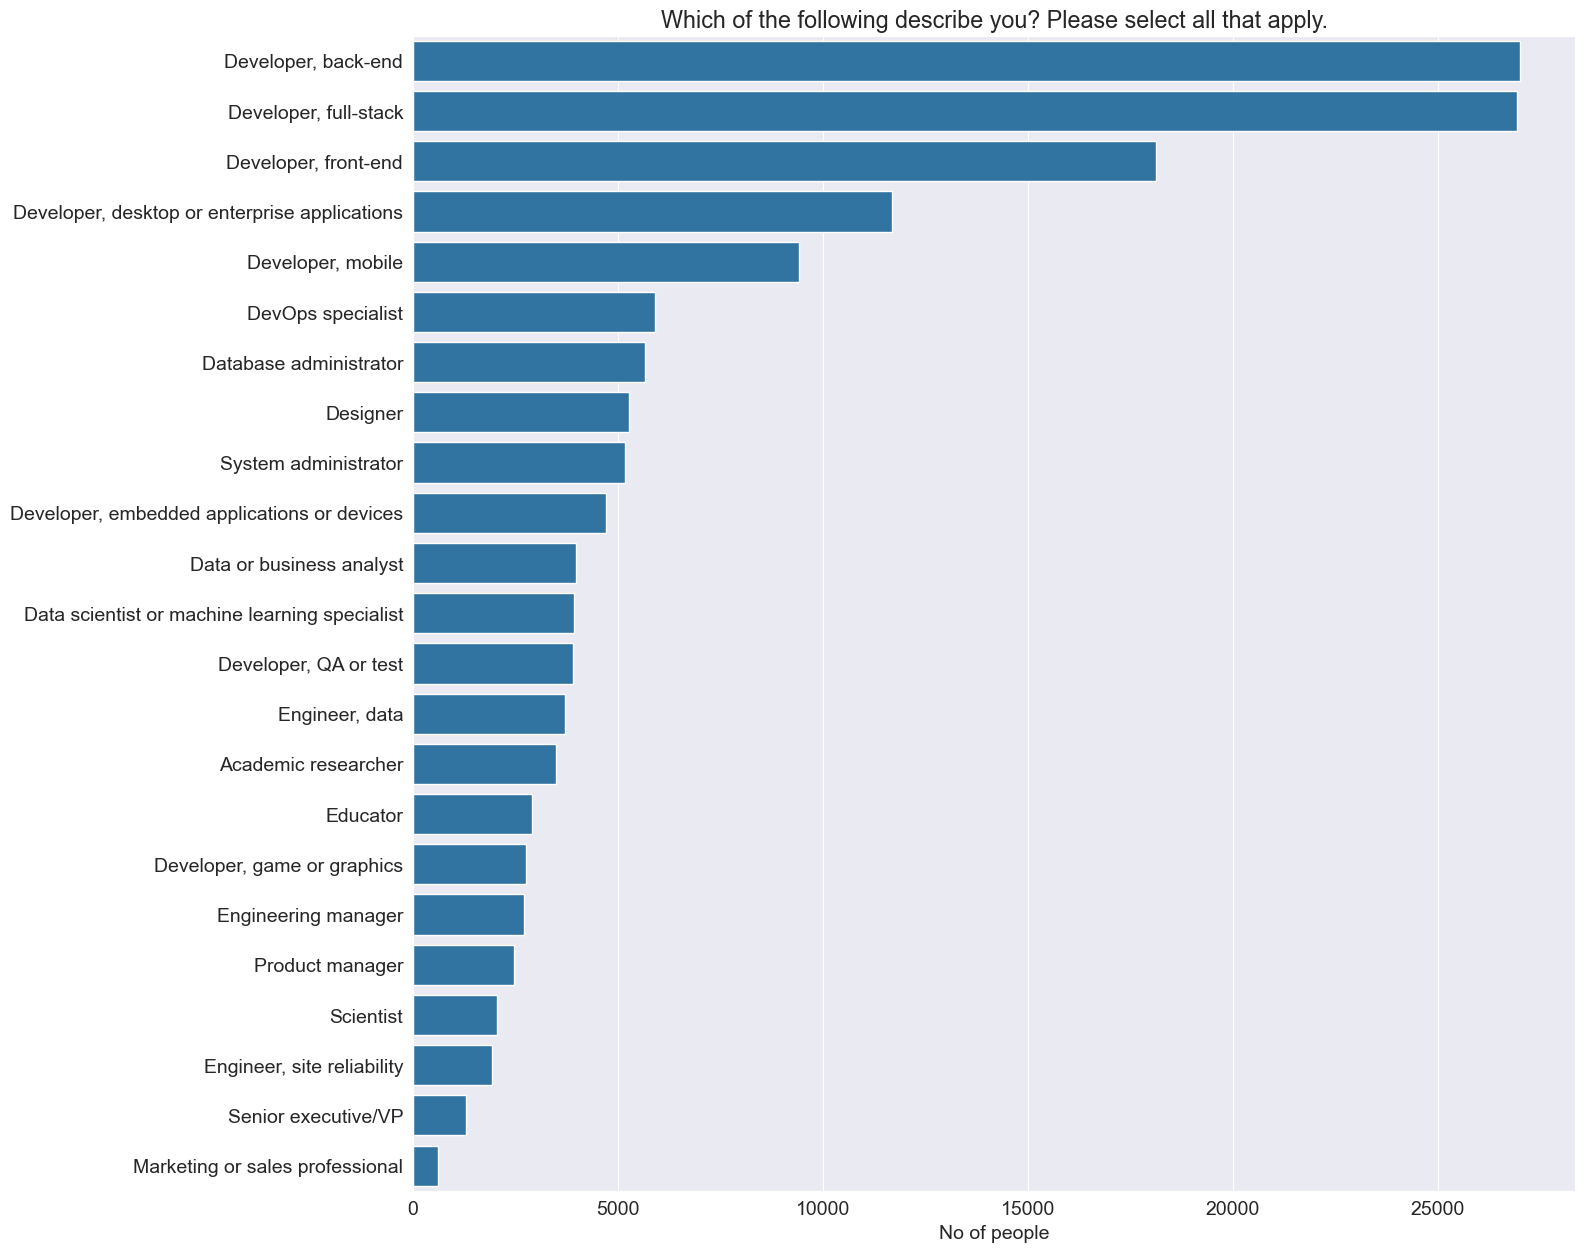

In [238]:
plt.figure(figsize=(15,15));
sns.barplot(x=dev_type_totals, y=dev_type_totals.index)
plt.title(schema.DevType)
plt.ylabel(None);
plt.xlabel('No of people');

In [240]:
schema.Hobbyist

'Do you code as a hobby?'

In [242]:
survey_df.Hobbyist

0        Yes
1         No
2        Yes
3        Yes
4        Yes
        ... 
64456    Yes
64457    Yes
64458    Yes
64459    Yes
64460    Yes
Name: Hobbyist, Length: 64306, dtype: object

In [244]:
hobbyist_sum=survey_df.Hobbyist.value_counts()
hobbyist_sum

Hobbyist
Yes    50019
No     13931
Name: count, dtype: int64

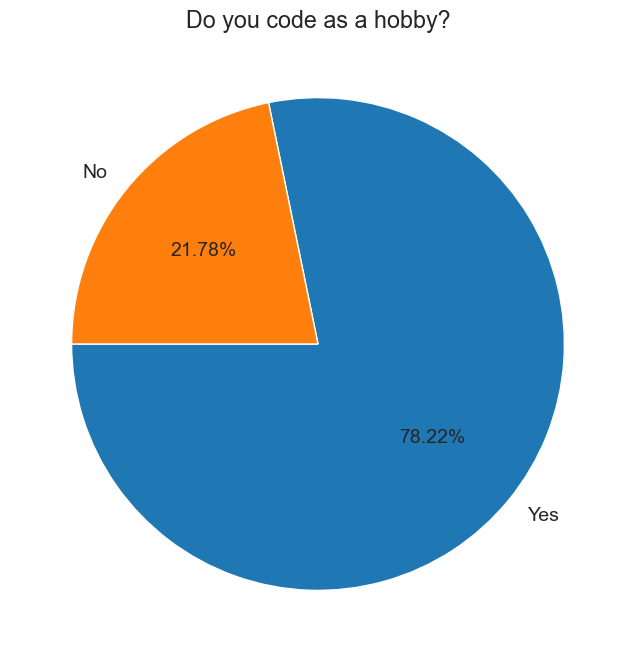

In [246]:
plt.figure(figsize=(12,8))
plt.title(schema.Hobbyist)
plt.pie(hobbyist_sum, labels=hobbyist_sum.index, autopct='%.2f%%', startangle=180);

It is clearly evident that majority of people i.e 78% of the people code as a hobby.

In [249]:
schema.JobSat

'How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)'

In [251]:
survey_df.JobSat

0           Slightly satisfied
1            Very dissatisfied
2                          NaN
3        Slightly dissatisfied
4                          NaN
                 ...          
64456                      NaN
64457                      NaN
64458                      NaN
64459                      NaN
64460                      NaN
Name: JobSat, Length: 64306, dtype: object

In [253]:
survey_jobsat_result= survey_df.JobSat.value_counts()
survey_jobsat_result

JobSat
Very satisfied                        14502
Slightly satisfied                    13811
Slightly dissatisfied                  7070
Neither satisfied nor dissatisfied     5747
Very dissatisfied                      3705
Name: count, dtype: int64

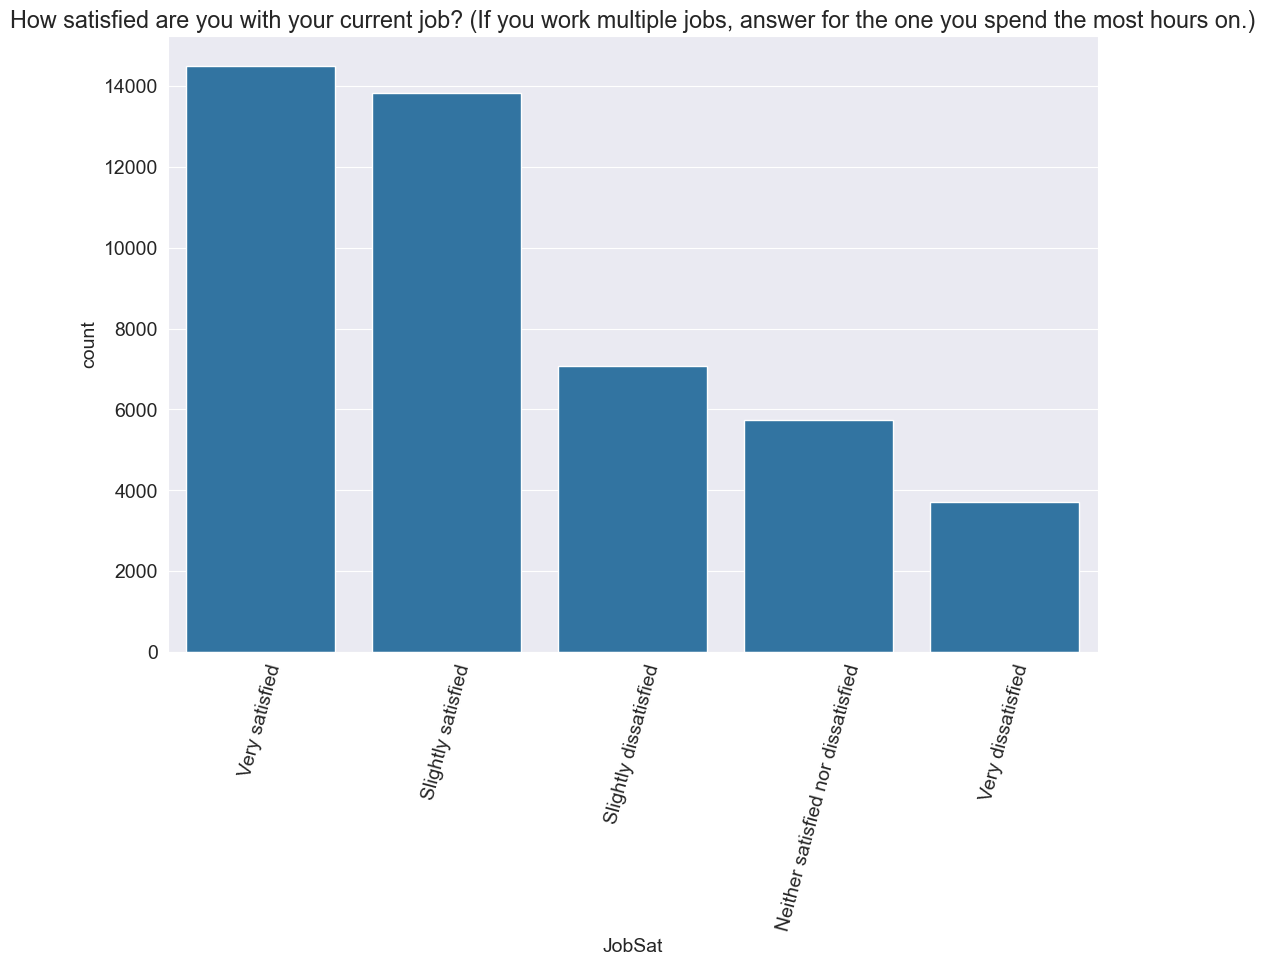

In [255]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=75)
plt.title(schema.JobSat)
sns.barplot(x=survey_jobsat_result.index, y=survey_jobsat_result);

With the help of above drawn barplot it can be easily concluded that high number of people are either satisfied than the number of people dissatisfied due to their job roles,

In [258]:
schema.JobFactors

'Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?'

In [260]:
survey_df.JobFactors

0        Languages, frameworks, and other technologies ...
1                                                      NaN
2                                                      NaN
3        Flex time or a flexible schedule;Office enviro...
4                                                      NaN
                               ...                        
64456                                                  NaN
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: JobFactors, Length: 64306, dtype: object

Since every entry contains more than one option, analysis becomes difficult, thus we will use the `split_multicolumn` function to create a new dataframe containing column for each of the entries.
Thus calling the ~split_multicolumn~ over `JobFactors` column.

In [263]:
JobFactors_df=split_multicolumn(survey_df.JobFactors)
JobFactors_df

,"Languages, frameworks, and other technologies I’d be working with",Remote work options,Opportunities for professional development,Flex time or a flexible schedule,Office environment or company culture,Diversity of the company or organization,Family friendliness,How widely used or impactful my work output would be,Industry that I’d be working in,Financial performance or funding status of the company or organization,Specific department or team I’d be working on
0,True,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,False
64457,False,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,False


In [265]:
JobFactors_total=JobFactors_df.sum().sort_values(ascending=False)
JobFactors_total

Languages, frameworks, and other technologies I’d be working with         25146
Office environment or company culture                                     21801
Flex time or a flexible schedule                                          21483
Opportunities for professional development                                20266
Remote work options                                                       16290
How widely used or impactful my work output would be                      10205
Industry that I’d be working in                                            7513
Family friendliness                                                        5938
Financial performance or funding status of the company or organization     5855
Specific department or team I’d be working on                              5764
Diversity of the company or organization                                   3300
dtype: int64

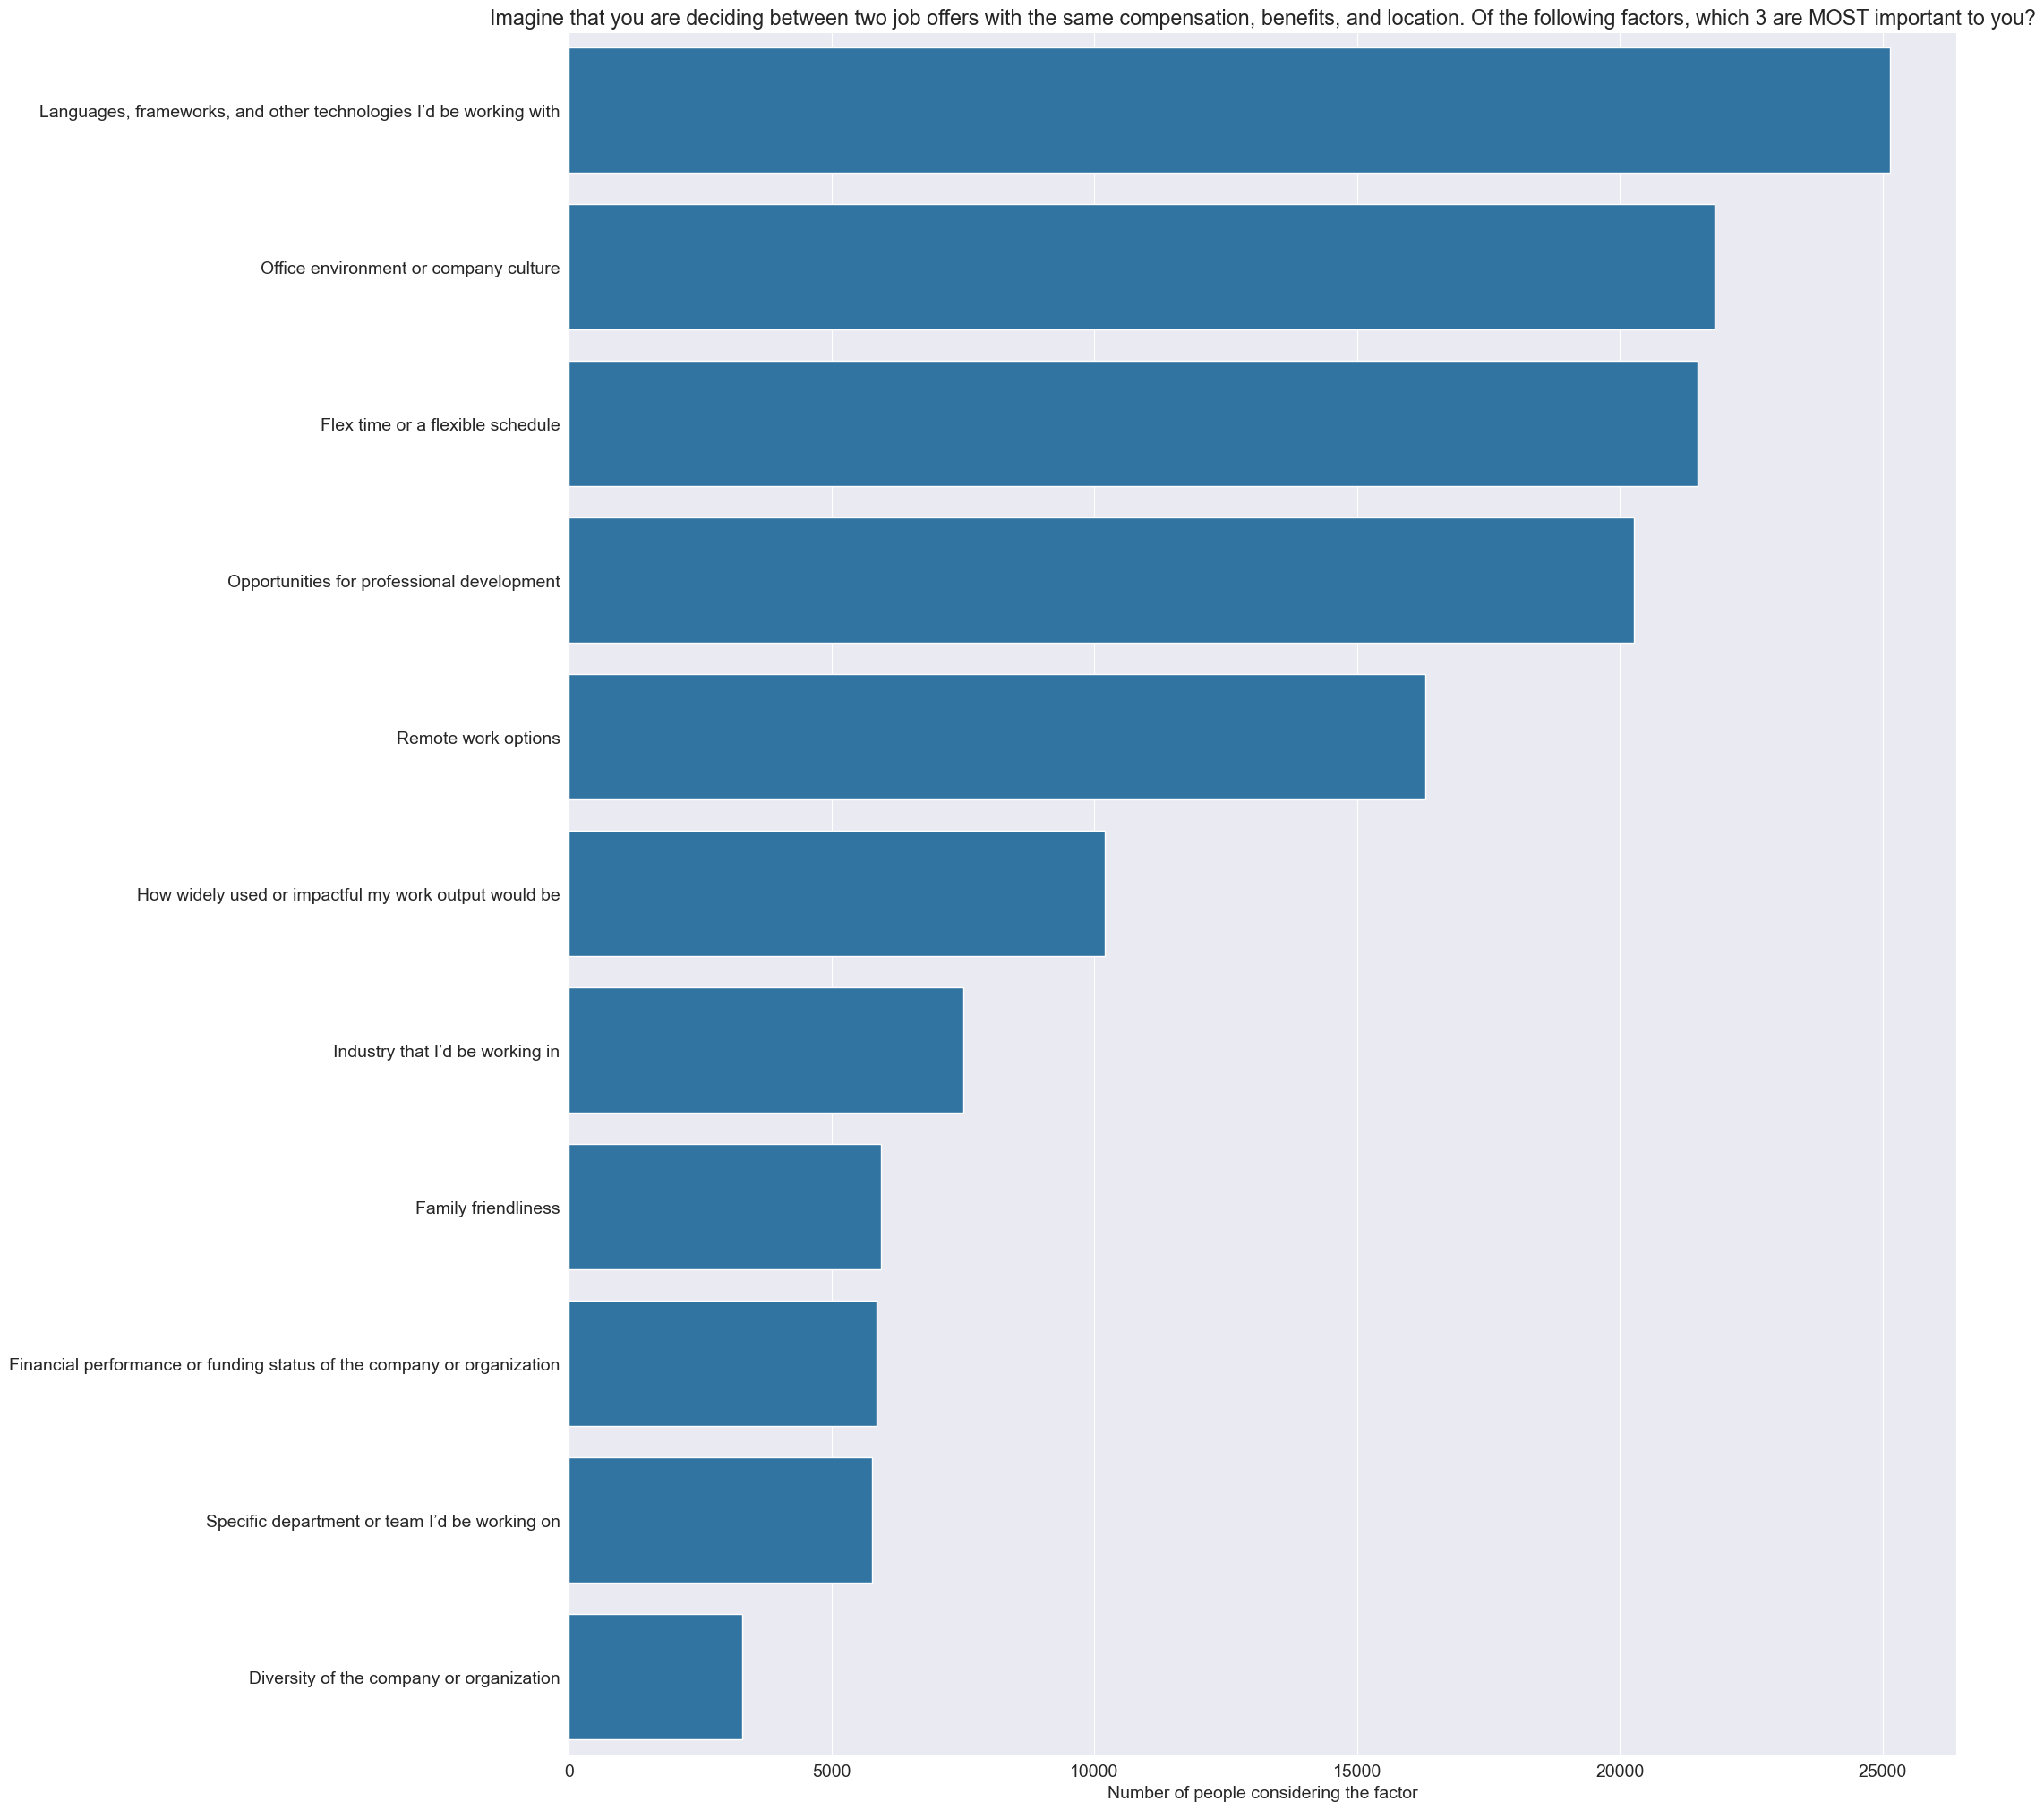

In [267]:
plt.figure(figsize=(20,25));
sns.barplot(x=JobFactors_total, y=JobFactors_total.index)
plt.title(schema.JobFactors)
plt.ylabel(None);
plt.xlabel('Number of people considering the factor');

With the help of above plotted graph we can easily conclude that technologies to be used,company enviornment & culture and flexibilty in schedule are the main factors which are top priorities for majority of the programmers.

In [270]:
schema. NEWLearn

'How frequently do you learn a new language or framework?'

In [272]:
survey_df.NEWLearn

0          Once a year
1          Once a year
2        Once a decade
3          Once a year
4          Once a year
             ...      
64456    Once a decade
64457              NaN
64458              NaN
64459      Once a year
64460      Once a year
Name: NEWLearn, Length: 64306, dtype: object

In [274]:
NewLearnCount=survey_df. NEWLearn.value_counts() 
NewLearnCount

NEWLearn
Every few months        20771
Once a year             20534
Once every few years    13194
Once a decade            1231
Name: count, dtype: int64

Let's plot a pie chart to visualize this same data. 

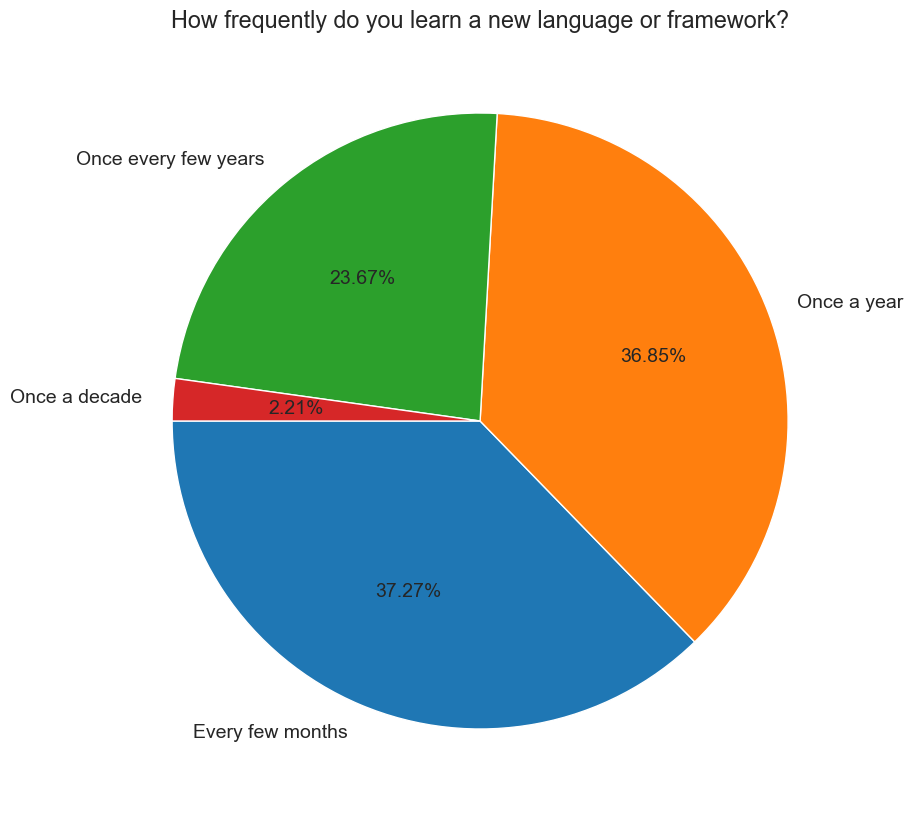

In [277]:
plt.figure(figsize=(15,10))
plt.title(schema.NEWLearn)
plt.pie(NewLearnCount,labels=NewLearnCount.index, autopct='%.2f%%', startangle=180);

From the above pie chart it can be easily deduced that most of the people either learn new language or framework at every few months or once a year.

In [280]:
schema.NEWStuck 

'What do you do when you get stuck on a problem? Select all that apply.'

In [282]:
survey_df.NEWStuck

0        Visit Stack Overflow;Go for a walk or other ph...
1        Visit Stack Overflow;Go for a walk or other ph...
2                                                      NaN
3                                                      NaN
4        Call a coworker or friend;Visit Stack Overflow...
                               ...                        
64456                            Call a coworker or friend
64457                                                  NaN
64458                                                  NaN
64459       Call a coworker or friend;Visit Stack Overflow
64460    Meditate;Visit Stack Overflow;Go for a walk or...
Name: NEWStuck, Length: 64306, dtype: object

In [284]:
NewStuck_count=survey_df.NEWStuck.value_counts()
NewStuck_count

NEWStuck
Visit Stack Overflow                                                                                                                                                         2886
Visit Stack Overflow;Watch help / tutorial videos                                                                                                                            2848
Call a coworker or friend;Visit Stack Overflow;Watch help / tutorial videos                                                                                                  2818
Call a coworker or friend;Visit Stack Overflow;Do other work and come back later                                                                                             2326
Call a coworker or friend;Visit Stack Overflow                                                                                                                               2186
                                                                                                     

In [286]:
NewStuck_count_df=split_multicolumn(survey_df.NEWStuck)
NewStuck_count_df

,Visit Stack Overflow,Go for a walk or other physical activity,Do other work and come back later,Call a coworker or friend,Watch help / tutorial videos,Visit another developer community (please name):,Play games,Meditate,Panic
0,True,True,True,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,True,False,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...
64456,False,False,False,True,False,False,False,False,False
64457,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False
64459,True,False,False,True,False,False,False,False,False


In [288]:
NewStuck_total=NewStuck_count_df.sum().sort_values(ascending= False)
NewStuck_total

Visit Stack Overflow                                49414
Do other work and come back later                   29666
Watch help / tutorial videos                        28800
Call a coworker or friend                           27186
Go for a walk or other physical activity            23586
Play games                                           8162
Meditate                                             6352
Panic                                                5906
Visit another developer community (please name):     5581
dtype: int64

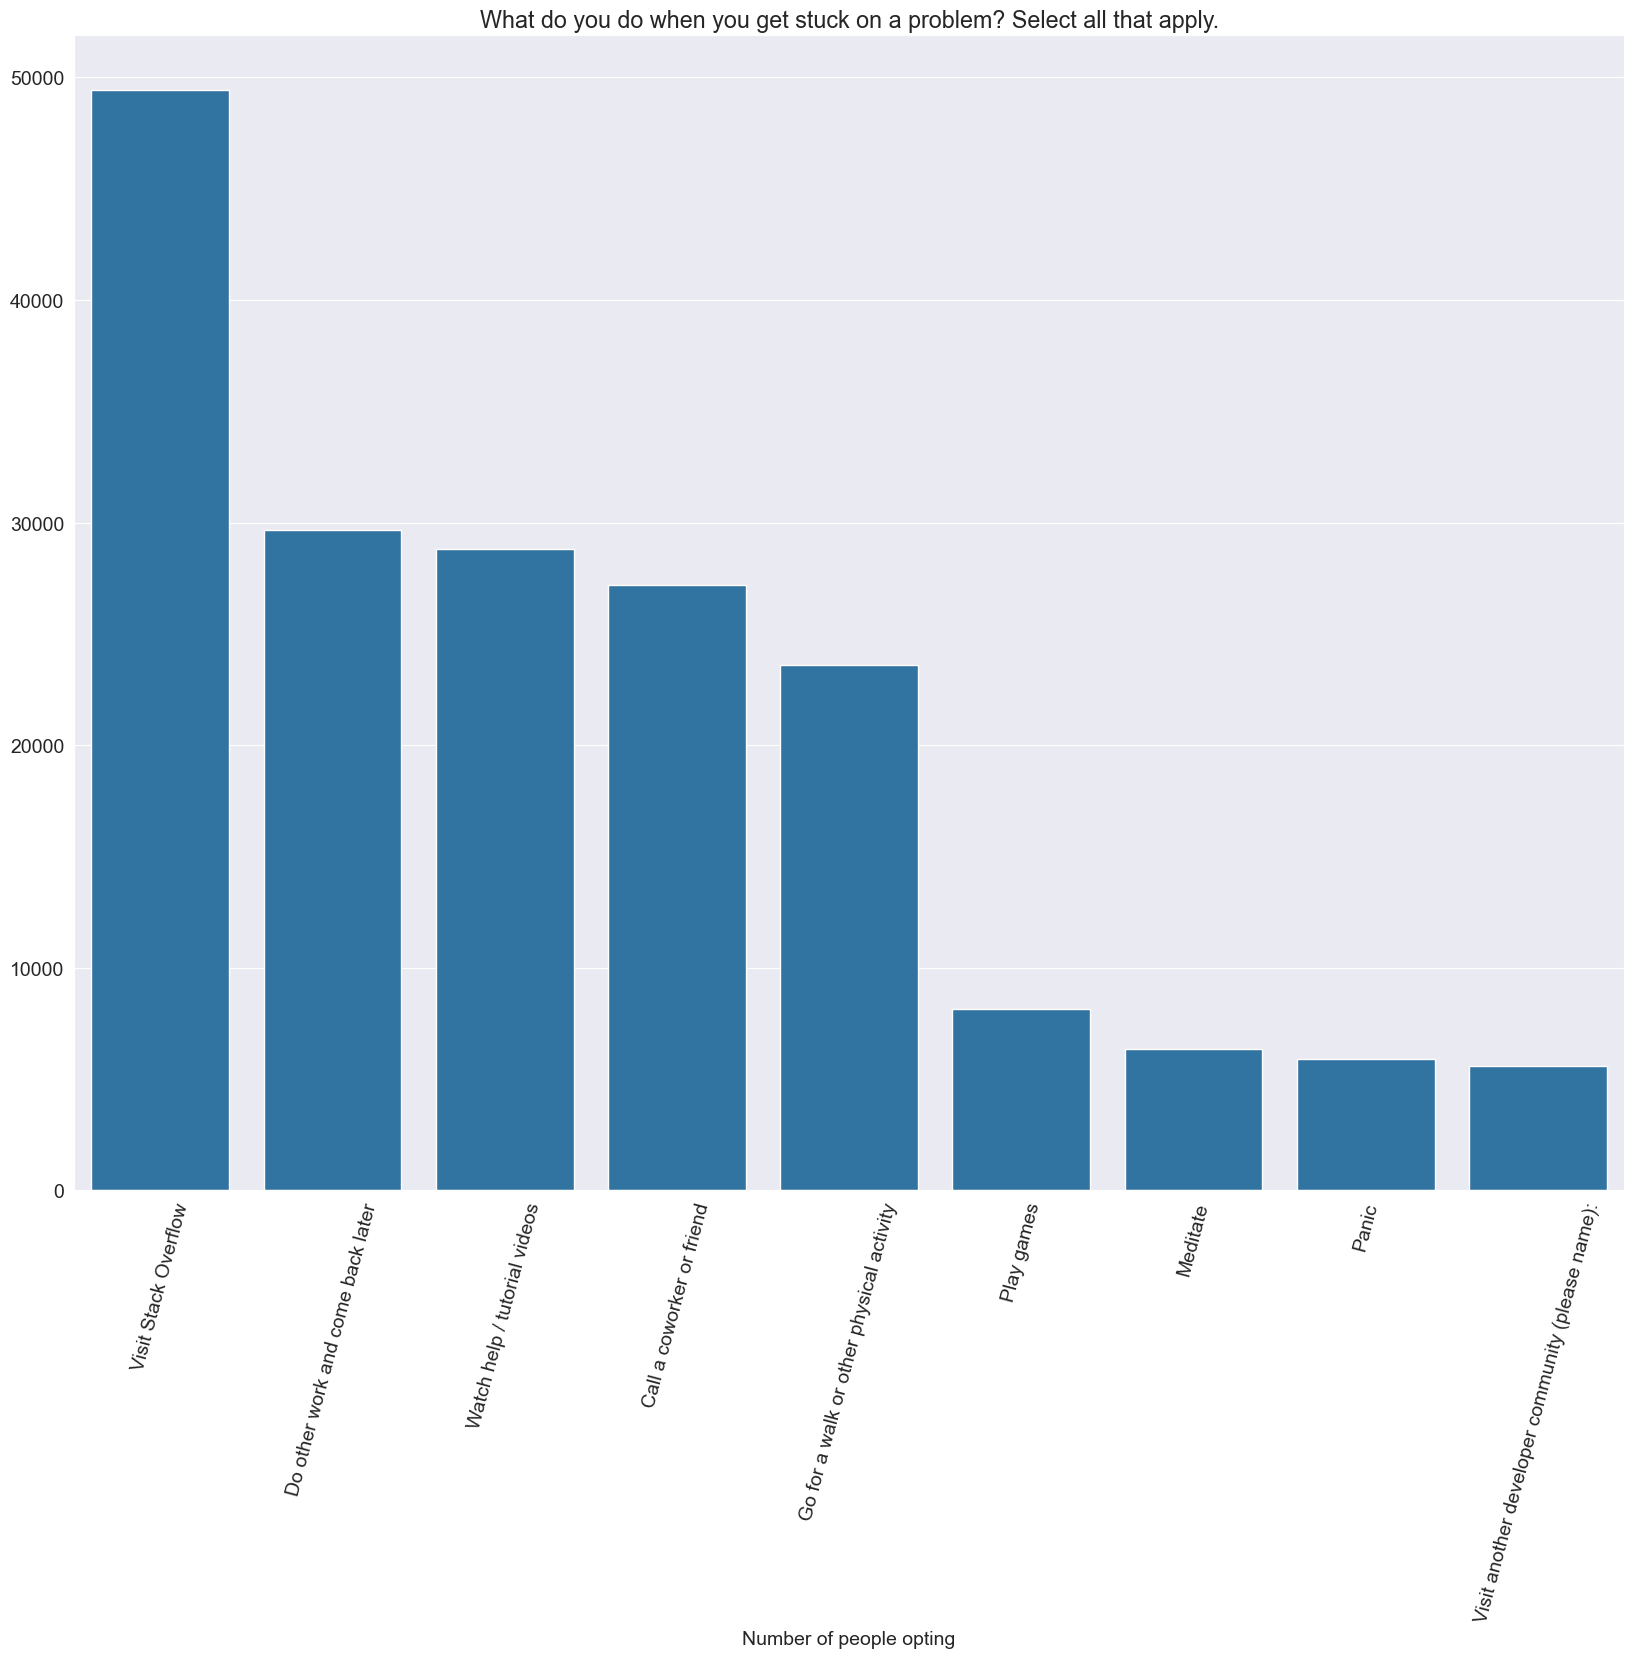

In [290]:
plt.figure(figsize=(20,15));
plt.xticks(rotation=75)
sns.barplot(y=NewStuck_total, x=NewStuck_total.index)
plt.title(schema.NEWStuck)
plt.ylabel(None);
plt.xlabel('Number of people opting');

It seems like people prefer to visit stack overflow website whenever they stuck in a problem.

In [293]:
schema.NEWOvertime

'How often do you work overtime or beyond the formal time expectation of your job?'

In [295]:
overtime_results=survey_df.NEWOvertime.value_counts()
overtime_results

NEWOvertime
Sometimes: 1-2 days per month but less than weekly          11476
Often: 1-2 days per week or more                            10941
Occasionally: 1-2 days per quarter but less than monthly     9383
Rarely: 1-2 days per year or less                            6414
Never                                                        4662
Name: count, dtype: int64

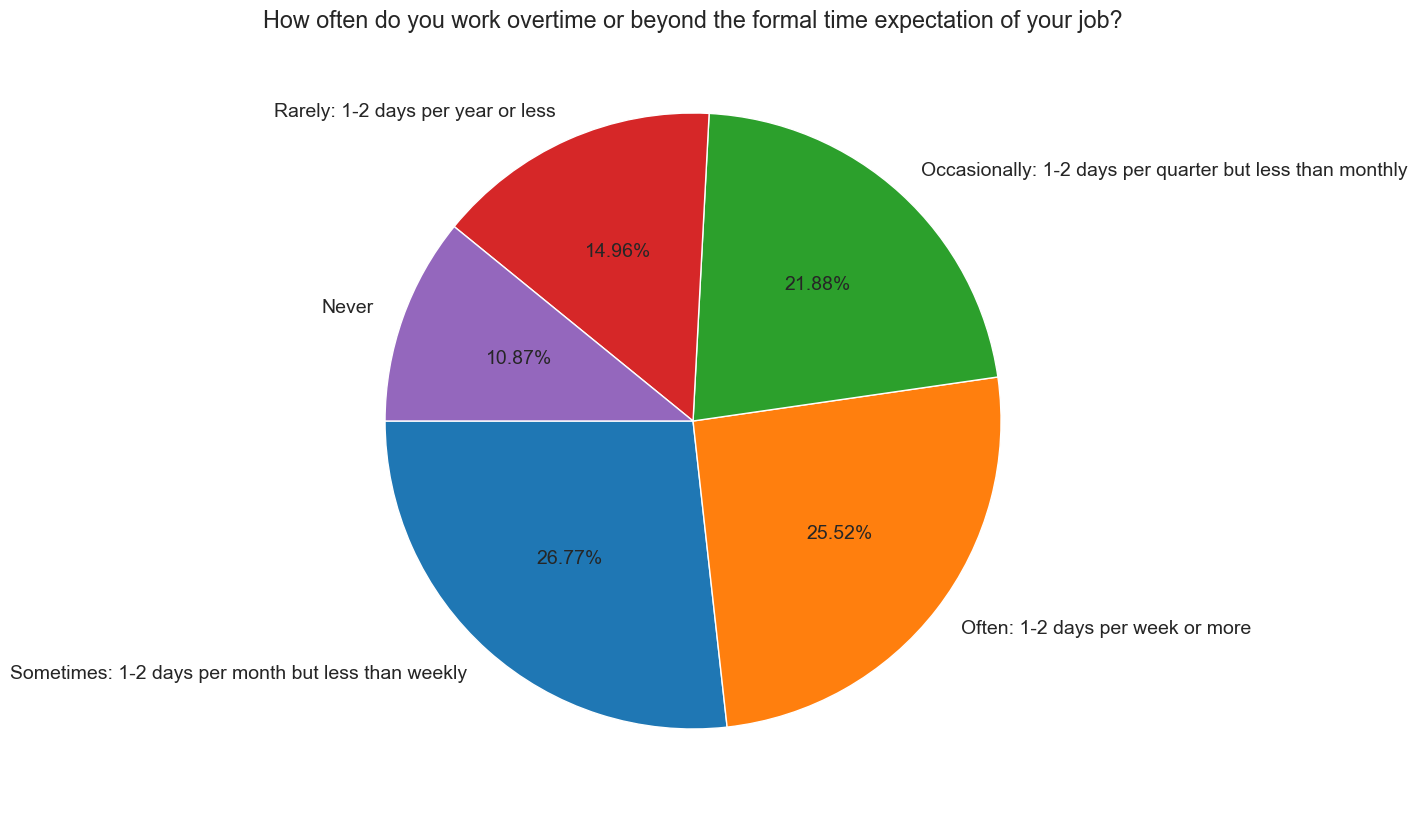

In [297]:
plt.figure(figsize=(15,10))
plt.title(schema.NEWOvertime)
plt.pie(overtime_results,labels=overtime_results.index, autopct='%.2f%%', startangle=180);

The data suggests that only few percent of people are opting for overtimes.

In [300]:
schema.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

In [302]:
survey_df.NEWEdImpt

0                          Fairly important
1                          Fairly important
2                                       NaN
3        Not at all important/not necessary
4                            Very important
                        ...                
64456                        Very important
64457                                   NaN
64458                                   NaN
64459                                   NaN
64460                  Critically important
Name: NEWEdImpt, Length: 64306, dtype: object

In [304]:
NEWEdImpt_count=survey_df.NEWEdImpt.value_counts()
NEWEdImpt_count

NEWEdImpt
Fairly important                      12588
Very important                        11783
Somewhat important                    11298
Not at all important/not necessary     7707
Critically important                   4716
Name: count, dtype: int64

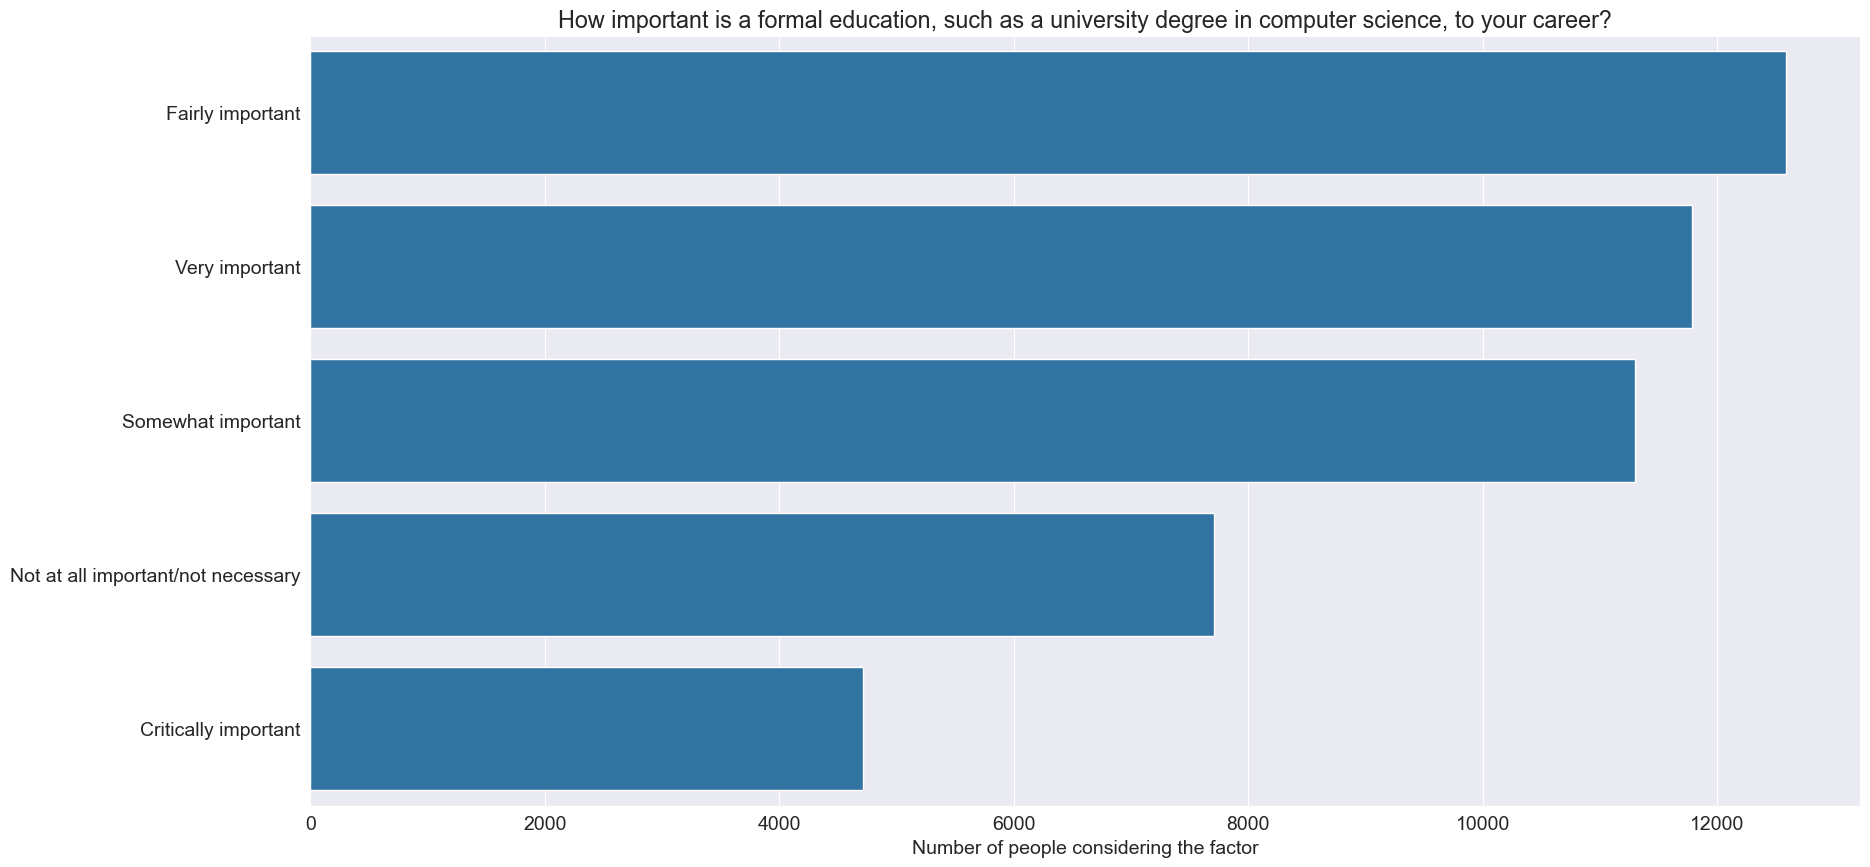

In [306]:
plt.figure(figsize=(20,10));
sns.barplot(x=NEWEdImpt_count, y=NEWEdImpt_count.index)
plt.title(schema.NEWEdImpt)
plt.ylabel(None);
plt.xlabel('Number of people considering the factor');

Using the above plot the trend could be easily analyzed.

## Asking and Answering Questions

#### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

To answer this question, we'll need to use the `groupby` data frame method to aggregate the rows for each country. We'll also need to filter the results to only include the countries with more than 250 respondents.

In [400]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [402]:
countries_df

,WorkWeekHrs
Country,
Kuwait,58.222222
Iraq,52.153846
Grenada,50.000000
Maldives,47.300000
Afghanistan,46.500000
...,...
North Korea,NaN
Saint Lucia,NaN
Sierra Leone,NaN


In [404]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [406]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


<Axes: xlabel='Country', ylabel='WorkWeekHrs'>

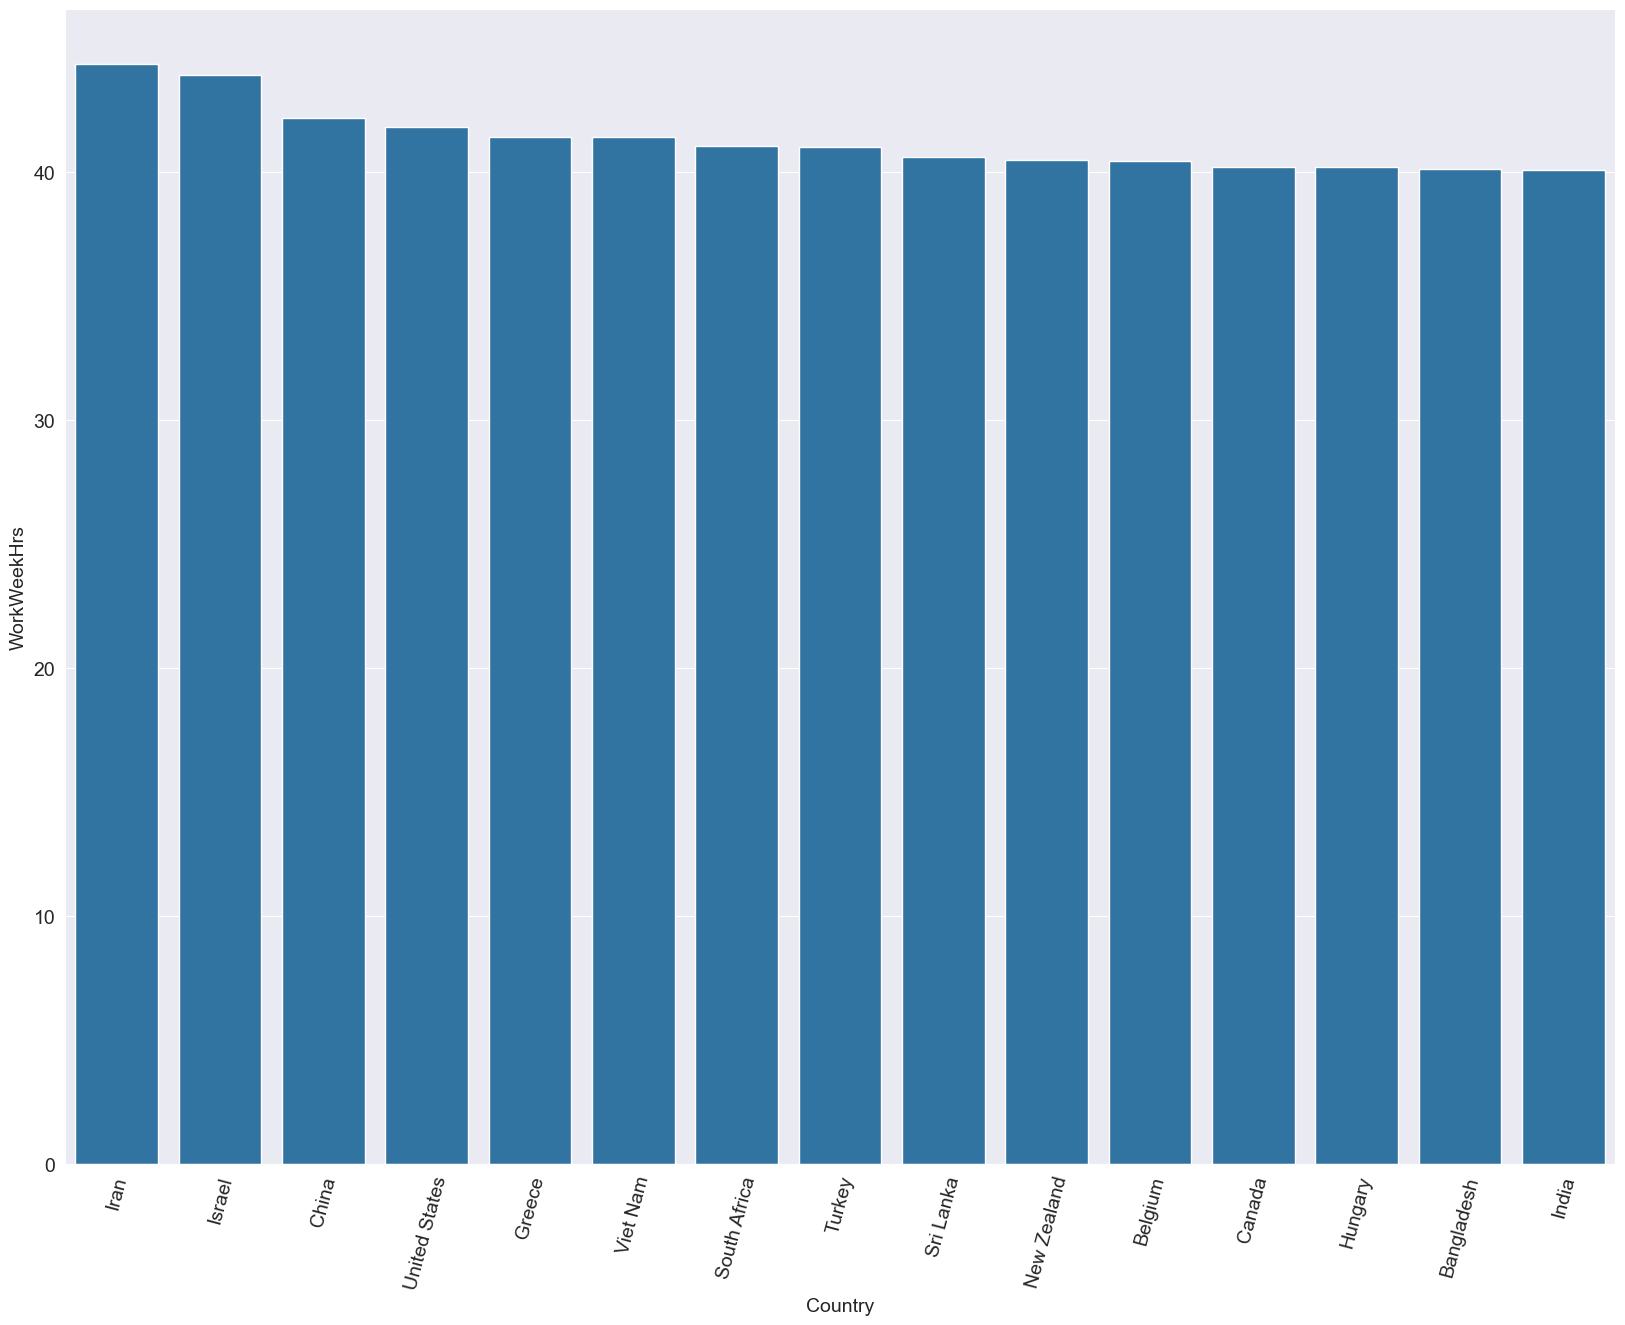

In [408]:
plt.figure(figsize=(20,15));
plt.xticks(rotation=75)
sns.barplot(x=high_response_countries_df.index, y=high_response_countries_df.	WorkWeekHrs)

The Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.

#### Q: How important is it to start young to build a career in programming?

Let's create a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience) to answer this question.

In [416]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

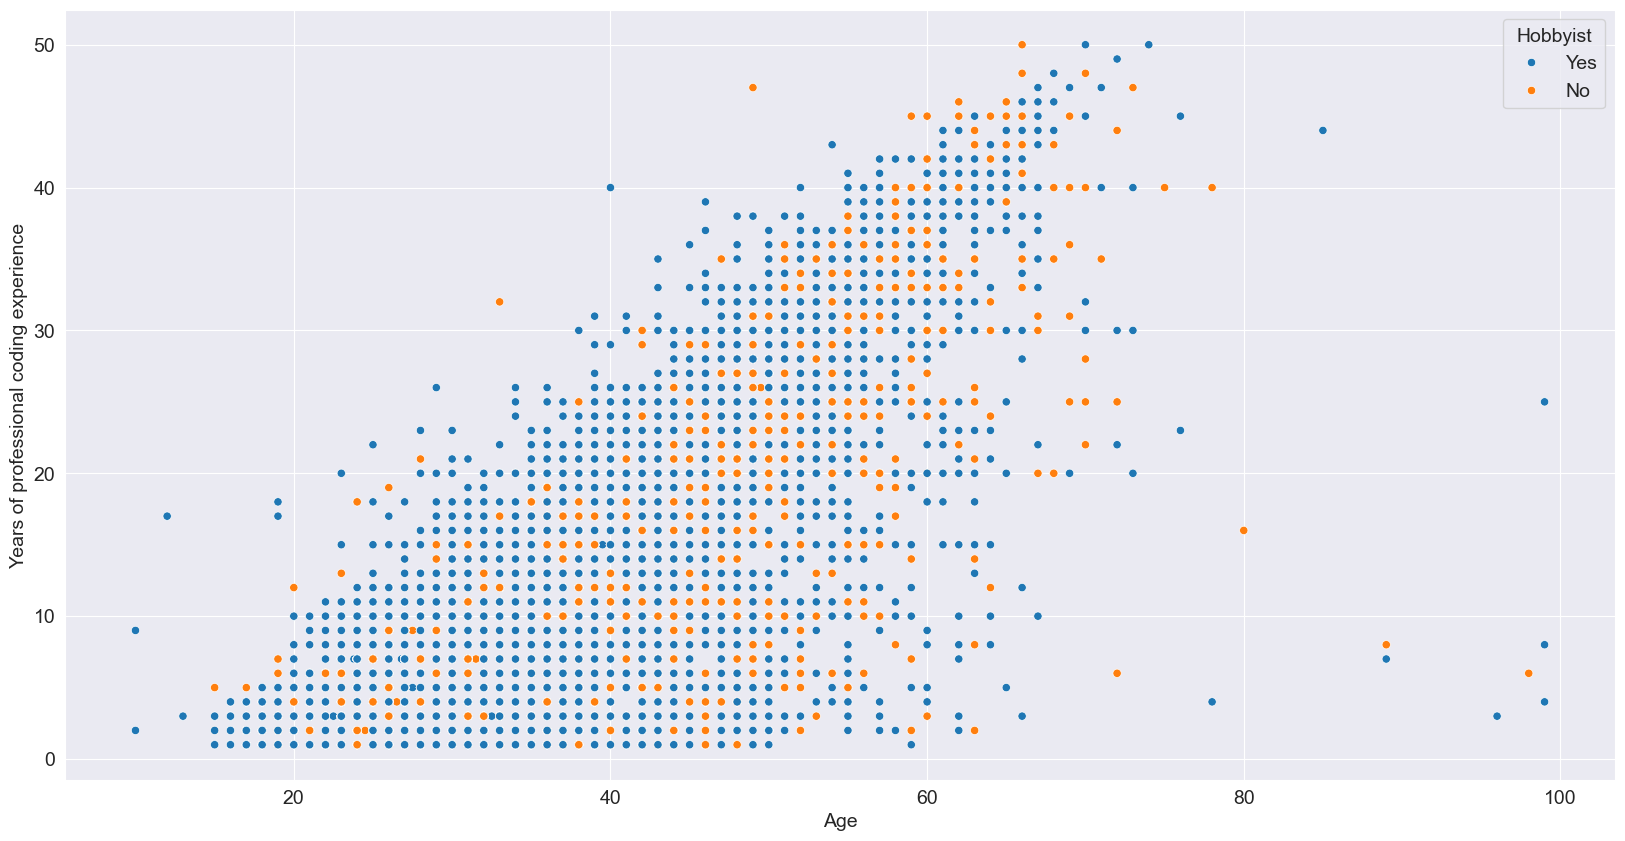

In [418]:
plt.figure(figsize=(20,10));
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

We can see points all over the graph, which indicates that one can **start programming professionally at any age**. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

We can also view the distribution of the `Age1stCode` column to see when the respondents tried programming for the first time.

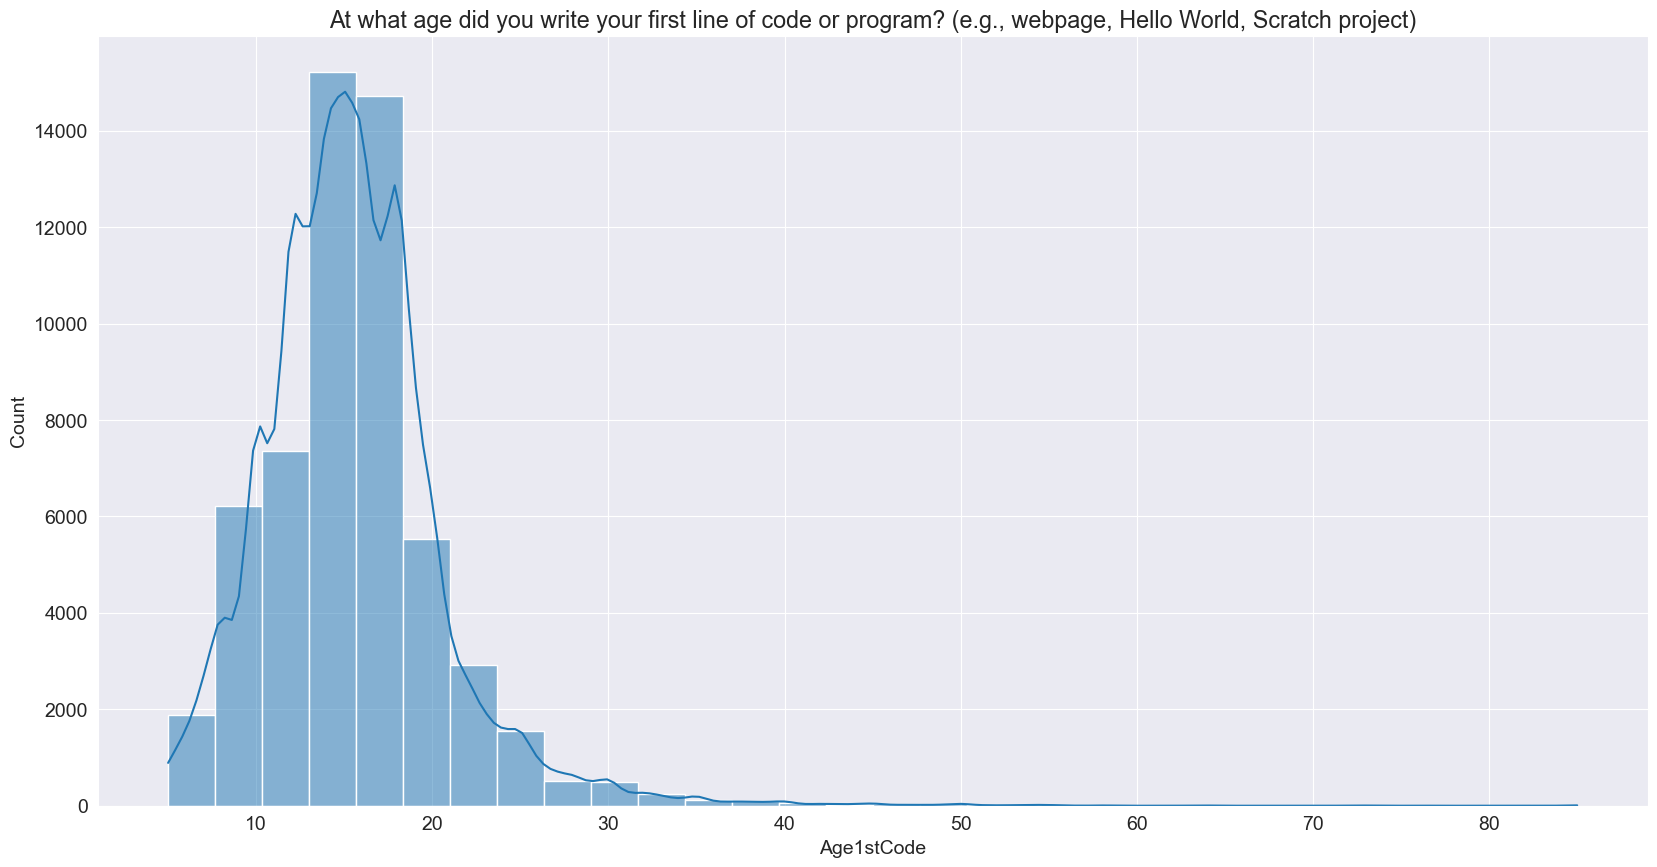

In [423]:
plt.figure(figsize=(20,10));
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

As we might expect, most people seem to have had some exposure to programming before the age of 40. However, but there are people of all ages and walks of life learning to code.

**We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset.Let's discuss the most important question of this EDA i.e about the languages most used and languages people are most interested in**.

#### Q: What are the most popular programming languages in 2020? 

To answer, this we can use the `LanguageWorkedWith` column. Similar to `DevType`, respondents were allowed to choose multiple options here.

In [428]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [430]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [432]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [434]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [436]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.

In [439]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

We can plot this information using a horizontal bar chart.

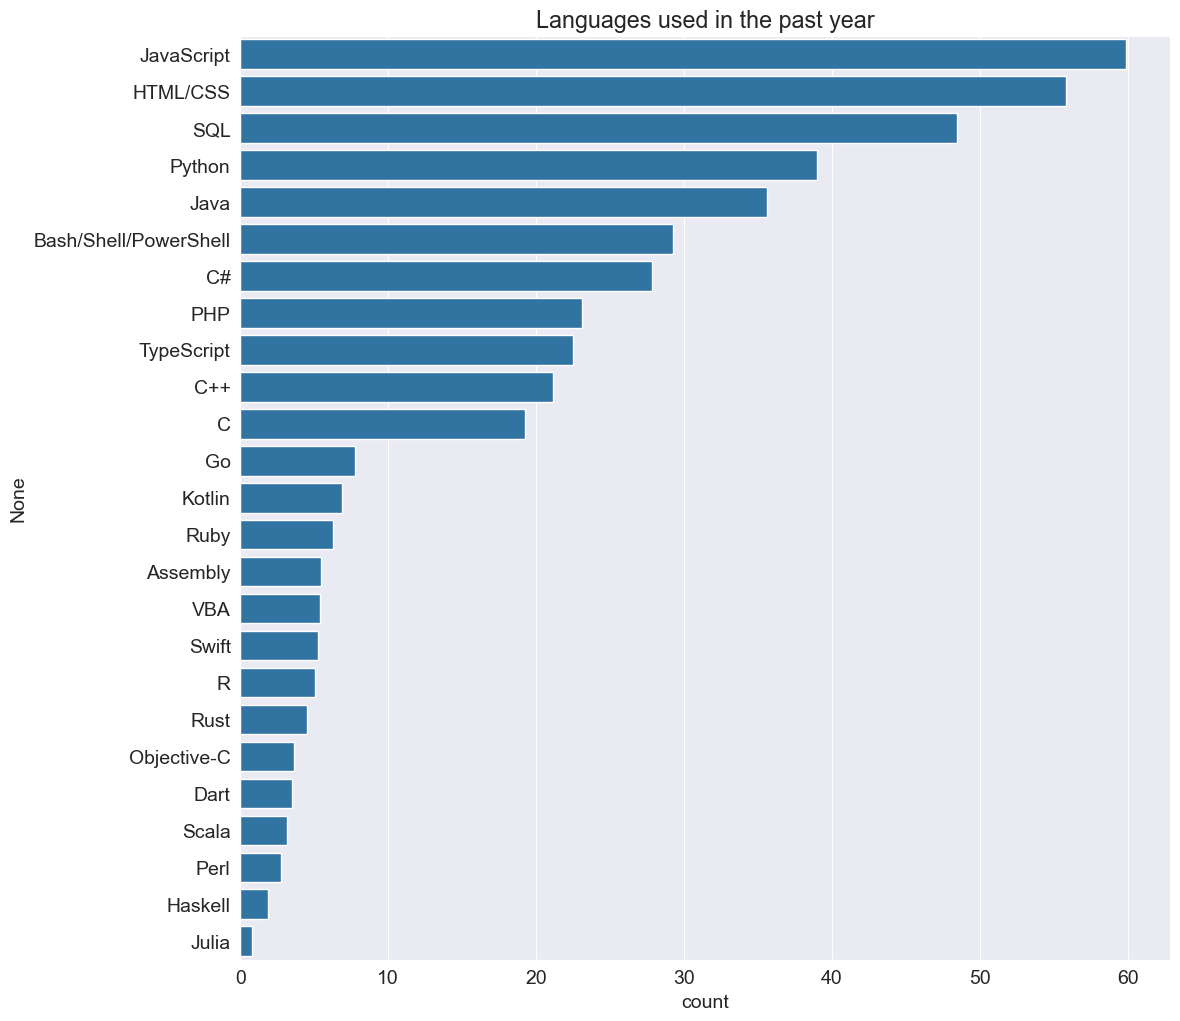

In [444]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

Perhaps unsurprisingly, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades.

#### Q: Which languages are the most people interested to learn over the next year?

For this, we can use the `LanguageDesireNextYear` column, with similar processing as the previous one.

In [448]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

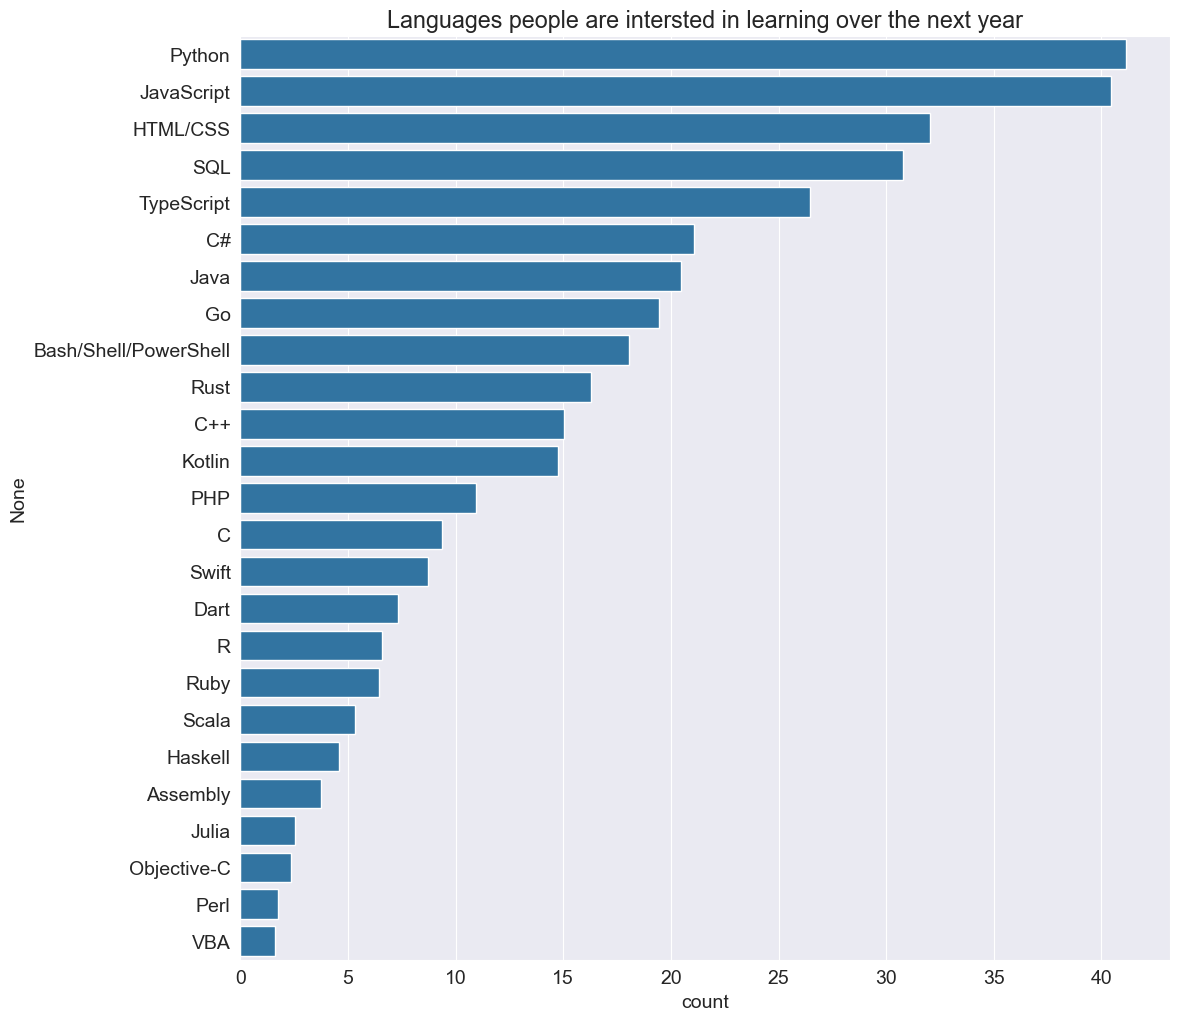

In [450]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

Once again, it's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc.

#### Q:  Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

We will solve using Pandas array operations. The steps to be followed are:

- Create a new data frame `languages_loved_df` that contains a `True` value for a language only if the corresponding values in `languages_worked_df` and `languages_interested_df` are both `True`
- Take the column-wise sum of `languages_loved_df` and divide it by the column-wise sum of `languages_worked_df` to get the percentage of respondents who "love" the language
- Sort the results in decreasing order and plot a horizontal bar graph

&- And bitwise Operator.

In [457]:
languages_loved_df = languages_worked_df & languages_interested_df

In [459]:
languages_loved_df

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [461]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

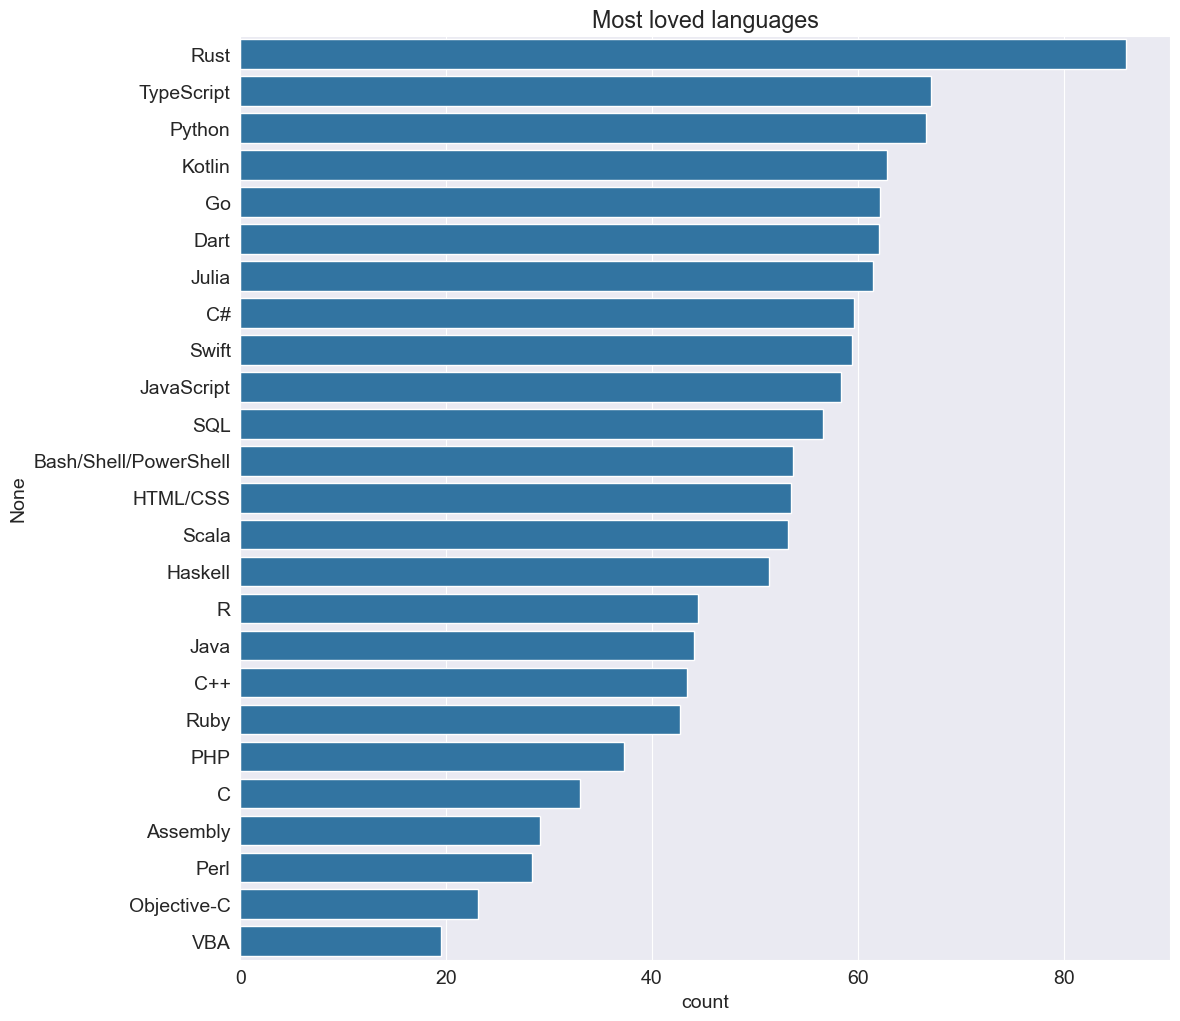

In [463]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

Rust seems to be StackOverflow's most-loved language for the year 2020.The second most-loved language is TypeScript, a popular alternative to JavaScript for web development.

Python features at number 3, despite already being one of the most widely-used languages in the world. Python has a solid foundation, is easy to learn & use, has a large ecosystem of domain-specific libraries, and a massive worldwide community.

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.


- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- We can learn and start programming professionally at any age. We're likely to have a long and fulfilling career if we enjoy programming as a hobby.

## References 


- Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python library: https://github.com/JovianML/opendatasets